# Time Series

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

In [ ]:
X_train_raw = np.load("/Volumes/Graziano Amodio/progetto DM2/RavdessAudioOnlyRavdessAudioOnlyNumpy__X_train.npy")
X_test_raw = np.load("/Volumes/Graziano Amodio/progetto DM2/RavdessAudioOnlyRavdessAudioOnlyNumpy__X_test.npy")
print(X_train_raw.shape, X_test_raw.shape)


(1828, 304304) (624, 304304)


Per capire come muovermi visualizzo il dataset con le time series che mi sono creato. Il dataset è composto da vettori che hanno come valore per ogni riga (per ogni registrazione) valori per distanze di tempo uguali.


mi rendo subito conto che devo sostituire i valori NaN con 0

In [ ]:
X_train_0 = np.nan_to_num(X_train_raw, nan=0)
X_test_0 = np.nan_to_num(X_test_raw, nan=0)

Per verificare cosa ho estratto mi stampo qualche riga che rappresenta appunto ad ogni registrazione

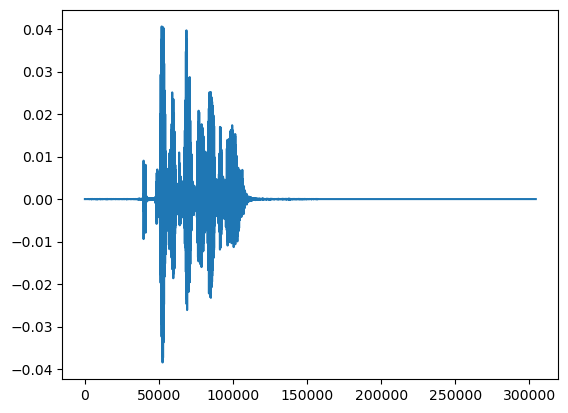

In [ ]:
ts0 = X_train[0]
plt.plot(ts0)
plt.show()

Adesso posso ridurre la qualità del mio audio per ottenere TS più leggere. Questa cosa la posso fare con la funzione decimate e posso scegliere un q di 8 dove q è Il fattore di decimazione, che specifica di quanti campioni si desidera ridurre la dimensione del segnale. Posso farlo perché la qualità dell'audio è elevata e ascoltando si riesce a capire cosa dice e soprattutto ad orecchio umano capisco emozione ecc. Distinguo tutte le caratteristiche della registazione insomma.

In [ ]:
from scipy.signal import decimate


# Fattore di decimazione
q = 8

# Applica la decimazione a tutte le righe della time series
X_train = np.zeros((X_train_raw.shape[0], X_train_raw.shape[1] // q))
for i, row in enumerate(X_train_raw):
    X_train[i] = decimate(row, q)

# Stampa le dimensioni prima e dopo la decimazione
print("Dimensioni prima della decimazione:", X_train_raw.shape)
print("Dimensioni dopo la decimazione:", X_train.shape)


Dimensioni prima della decimazione: (1828, 304304)
Dimensioni dopo la decimazione: (1828, 38038)


In [ ]:
np.save('/Users/mbpro/Desktop/DATA SCIENCE/Data Mining/DM2/Progetto DM2/ravdess_features_dm2/data_mining_2/X_train_decimato_nan.npy', X_train)

In [ ]:
from scipy.signal import decimate


# Fattore di decimazione
q = 8

# Applica la decimazione a tutte le righe della time series
X_test = np.zeros((X_test_raw.shape[0], X_test_raw.shape[1] // q))
for i, row in enumerate(X_test_raw):
    X_test[i] = decimate(row, q)

# Stampa le dimensioni prima e dopo la decimazione
print("Dimensioni prima della decimazione:", X_test_raw.shape)
print("Dimensioni dopo la decimazione:", X_test.shape)


Dimensioni prima della decimazione: (624, 304304)
Dimensioni dopo la decimazione: (624, 38038)


In [ ]:
np.save('/Users/mbpro/Desktop/DATA SCIENCE/Data Mining/DM2/Progetto DM2/ravdess_features_dm2/data_mining_2/X_test_decimato_nan.npy', X_test)

## codice con TS ridotte!

In [ ]:
# dopo aver decimato e salvato gli array ridotti, ricarico solamente i dataset leggeri. Da adesso in poi inizierò a
# runnare solo da questa parte del codice per evitare di sprecare la memoria. Ovviamente, ricordati delle librerie che
# per alcune possono essere sopra. Presto attenzione comunque a non sovrapporre il nome delle variabili e per questo
# motivo le ho rinominate in maniera diversa.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
X_train = np.load("/content/drive/MyDrive/Colab Notebooks/X_train_decimato.npy")
X_test = np.load("/content/drive/MyDrive/Colab Notebooks/X_test_decimato.npy")
print(X_train.shape, X_test.shape)


(1828, 38038) (624, 38038)


## **un grosso errore fatto fino ad ora!**
non abbiamo considerato mai cosa considerare come target, per questo tutto veniva sballato per clustering e shapelet e classification..



In [4]:
y_train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RavdessAudioOnlyRavdessAudioOnlyNumpy__Y_train.csv')

In [5]:
y_test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RavdessAudioOnlyRavdessAudioOnlyNumpy__Y_test.csv')

In [ ]:
y_test_df

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,filename
0,audio-only,speech,neutral,normal,Kids are talking by the door,1st,19,M,03-01-01-01-01-01-19.wav
1,audio-only,speech,neutral,normal,Kids are talking by the door,2nd,19,M,03-01-01-01-01-02-19.wav
2,audio-only,speech,neutral,normal,Dogs are sitting by the door,1st,19,M,03-01-01-01-02-01-19.wav
3,audio-only,speech,neutral,normal,Dogs are sitting by the door,2nd,19,M,03-01-01-01-02-02-19.wav
4,audio-only,speech,calm,normal,Kids are talking by the door,1st,19,M,03-01-02-01-01-01-19.wav
...,...,...,...,...,...,...,...,...,...
619,audio-only,song,fearful,normal,Dogs are sitting by the door,2nd,24,F,03-02-06-01-02-02-24.wav
620,audio-only,song,fearful,strong,Kids are talking by the door,1st,24,F,03-02-06-02-01-01-24.wav
621,audio-only,song,fearful,strong,Kids are talking by the door,2nd,24,F,03-02-06-02-01-02-24.wav
622,audio-only,song,fearful,strong,Dogs are sitting by the door,1st,24,F,03-02-06-02-02-01-24.wav


In [6]:
y_train = y_train_df[['vocal_channel']]

In [7]:
y_test = y_test_df[['vocal_channel']]

In [ ]:
# osserviamo il dataset
X_train_visto = pd.DataFrame(X_train)
print(X_train_visto)

             0             1             2             3             4      \
0     8.386923e-08 -2.924419e-07  5.272880e-07 -8.932308e-07  1.672662e-06   
1    -2.978562e-08 -1.401316e-06 -1.013950e-05 -8.966593e-06 -3.628661e-08   
2     2.977816e-05  2.642960e-05  2.792839e-05  3.585964e-05  2.926376e-05   
3     3.035490e-05  2.516304e-06  3.707888e-05  2.030241e-05 -6.659642e-06   
4     3.015393e-05 -4.793966e-06  1.374216e-06 -3.326954e-07 -7.442917e-07   
...            ...           ...           ...           ...           ...   
1823  1.839941e-08 -2.491045e-08  2.557955e-08 -1.751993e-08 -2.838495e-10   
1824  4.360604e-08  3.022369e-08 -1.125262e-07  2.445316e-07 -2.993058e-07   
1825  3.317559e-08 -5.241922e-08  6.101579e-08 -5.241371e-08  2.518677e-08   
1826  1.042319e-11 -7.574328e-12  8.747767e-13  9.028098e-12 -2.009979e-11   
1827  2.624758e-07 -3.497499e-06 -7.576302e-07 -5.028327e-08  2.463718e-07   

             5             6             7             8       

In [ ]:
# vediamo quanto è lungo il dataset dopo il taglio
print(X_train.shape)

(1828, 38038)


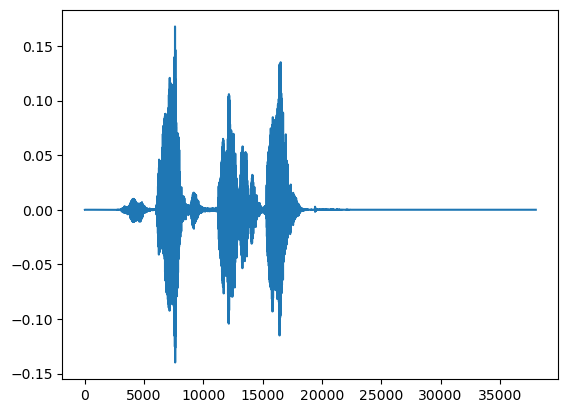

In [ ]:
#questa è relativa a 03-01-01-01-01-01-01.wav
ts0 = X_train[50]
plt.plot(ts0)
plt.show()

In [8]:
# can i try to cut the first seconds of the time series and latest seconds
X_train_cut = X_train[:, 7500:15000]
X_test_cut = X_test[:, 7500:15000]
print(X_train_cut.shape)
print(X_test_cut.shape)

(1828, 7500)
(624, 7500)


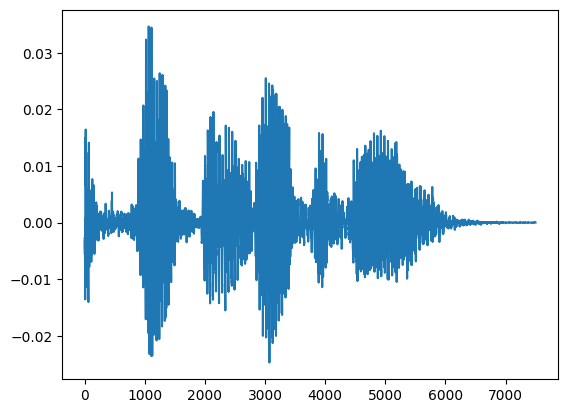

In [ ]:
#questa è relativa a 03-01-01-01-01-01-01.wav
ts0 = X_train_cut[0]
plt.plot(ts0)
plt.show()

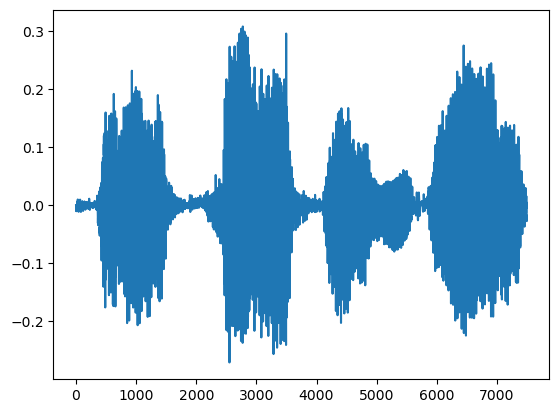

In [ ]:
ts1 = X_test_cut[300]
plt.plot(ts1)
plt.show()

In [ ]:
# let's check if nan are gone
nan_in_train = np.isnan(X_train_cut)
print(nan_in_train.any())

False


In [ ]:
# Piccolo riassunto delle cose fatte fin ora: ho ridotto la qualità delle time series e le ho tagliate circa
# alla lunghezza media. In questo modo perdo per le song al massimo pochi secondi ma dovrei riuscire a runnare tutto.
# Lavorando con vocal_channel in realtà è interessante vedere la differenza considerando che fin ora i classificatori
# utilizzavano come "main feature" la lunghezza. Vediamo!

### approximation

In [9]:
from IPython.display import clear_output
!pip install tslearn
!pip install pyts
!pip install kds
!pip install matrixprofile-ts
!pip install sktime
!pip install prefixspan
!pip install spmf

clear_output(wait=True)
print('All the packages were installed')

All the packages were installed


In [10]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Time Series Preprocessing
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

#Time Series Approximation
from pyts.approximation import DiscreteFourierTransform
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation

#Main classification metrics and utilities
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
#import kds #for the lift

#Classifiers
from sklearn.tree import DecisionTreeClassifier
from pyts.classification import KNeighborsClassifier
from tslearn.neighbors import KNeighborsTimeSeriesClassifier

#Time Series Clustering
from tslearn.clustering import TimeSeriesKMeans
from matplotlib.pyplot import cm

#Shapelets
from tensorflow.keras.optimizers import Adagrad
from tslearn.shapelets import LearningShapelets
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict
from pyts.transformation import ShapeletTransform

#matrixprofile
from matrixprofile import motifs
from matrixprofile.discords import discords
from matrixprofile import matrixProfile

#CNN
from keras.models import Sequential
from keras.layers import Dense, Dropout, GlobalAveragePooling1D
from keras.layers import Conv1D, Activation, Conv1D, BatchNormalization
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

#Rocket
from sklearn.linear_model import RidgeClassifierCV
from sktime.transformations.panel.rocket import MiniRocket

#Sequential Pattern Mining
from prefixspan import PrefixSpan
from spmf import Spmf


#To avoid repetitive warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)



### Cella importante!!! RICORDA DI USARE X_train_cut!
non l'ho sostituita completamente perché voglio fare delle prove per vedere se è stato tagliato troppo.

In [11]:
X_dft = X_train_cut
X = pd.DataFrame(X_dft)

In [12]:
def dft_inverse_trasform(X_dft, n_coefs, n_timestamps):
    # Compute the inverse transformation
    n_samples = X_dft.shape[0]
    if n_coefs % 2 == 0:
        real_idx = np.arange(1, n_coefs, 2)
        imag_idx = np.arange(2, n_coefs, 2)
        X_dft_new = np.c_[
            X_dft[:, :1],
            X_dft[:, real_idx] + 1j * np.c_[X_dft[:, imag_idx],
                                            np.zeros((n_samples, ))]
        ]
    else:
        real_idx = np.arange(1, n_coefs, 2)
        imag_idx = np.arange(2, n_coefs + 1, 2)
        X_dft_new = np.c_[
            X_dft[:, :1],
            X_dft[:, real_idx] + 1j * X_dft[:, imag_idx]
        ]
    X_irfft = np.fft.irfft(X_dft_new, n_timestamps)
    return X_irfft

In [13]:
n_coefs = 16

dft = DiscreteFourierTransform(n_coefs=n_coefs)
ts_dft = dft.fit_transform(X_dft)

In [14]:
ts_dft_inv = dft_inverse_trasform(ts_dft, n_coefs=n_coefs, n_timestamps=len(X.columns))
ts_dft_inv

array([[-3.46033140e-05, -3.45956503e-05, -3.45874124e-05, ...,
        -3.46228588e-05, -3.46169184e-05, -3.46104034e-05],
       [-7.62836661e-06, -7.63696816e-06, -7.64543692e-06, ...,
        -7.60176702e-06, -7.61076586e-06, -7.61963245e-06],
       [ 4.84737404e-05,  4.84748516e-05,  4.84751692e-05, ...,
         4.84656463e-05,  4.84691377e-05,  4.84718357e-05],
       ...,
       [ 1.41090079e-04,  1.41167056e-04,  1.41242078e-04, ...,
         1.40847461e-04,  1.40930278e-04,  1.41011152e-04],
       [-3.63001258e-05, -3.63311376e-05, -3.63614570e-05, ...,
        -3.62029443e-05, -3.62360283e-05, -3.62684225e-05],
       [-4.00406200e-05, -3.99755750e-05, -3.99099972e-05, ...,
        -4.02325292e-05, -4.01691000e-05, -4.01051293e-05]])

In [ ]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499
count,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,...,1828.000000,1828.000000,1828.000000,1.828000e+03,1.828000e+03,1.828000e+03,1828.000000,1.828000e+03,1.828000e+03,1.828000e+03
mean,0.000008,-0.000037,0.000014,-0.000483,-0.000138,-0.000419,-0.001149,-0.000438,0.000698,0.001658,...,0.000884,0.000676,-0.000344,-1.211693e-03,-8.678913e-04,-4.458018e-08,-0.000196,5.790486e-04,3.407426e-04,-9.773992e-04
std,0.038880,0.034213,0.038222,0.036940,0.033563,0.038193,0.037220,0.034722,0.037964,0.041325,...,0.043053,0.042640,0.046493,4.342738e-02,4.489856e-02,4.485954e-02,0.042556,4.437848e-02,4.821537e-02,4.538666e-02
min,-0.449580,-0.266772,-0.529169,-0.265982,-0.270352,-0.399941,-0.555754,-0.355230,-0.311214,-0.303898,...,-0.384177,-0.431322,-0.762196,-4.300364e-01,-5.159017e-01,-4.735881e-01,-0.339160,-4.720025e-01,-7.702391e-01,-6.303462e-01
25%,-0.005970,-0.006001,-0.005598,-0.006340,-0.006304,-0.006857,-0.006908,-0.006724,-0.005761,-0.005577,...,-0.004304,-0.005038,-0.005101,-5.587634e-03,-4.968464e-03,-5.070307e-03,-0.004967,-4.633059e-03,-4.897510e-03,-5.105586e-03
50%,0.000259,0.000210,0.000159,-0.000127,-0.000010,-0.000027,-0.000048,0.000009,0.000072,0.000054,...,0.000010,0.000003,0.000005,-7.482575e-07,3.122492e-07,2.478231e-07,0.000001,5.048162e-07,-1.519829e-07,-5.978650e-07
75%,0.006571,0.006393,0.006114,0.005557,0.006536,0.005956,0.005937,0.005925,0.006388,0.006171,...,0.005505,0.005212,0.004821,4.532138e-03,4.921717e-03,4.936481e-03,0.004536,4.323231e-03,4.763162e-03,4.802631e-03
max,0.570741,0.334666,0.372060,0.400183,0.388911,0.503788,0.278705,0.317735,0.711718,0.943144,...,0.452471,0.473142,0.560331,5.005313e-01,4.027553e-01,7.647472e-01,0.625976,6.161562e-01,5.804877e-01,4.522801e-01


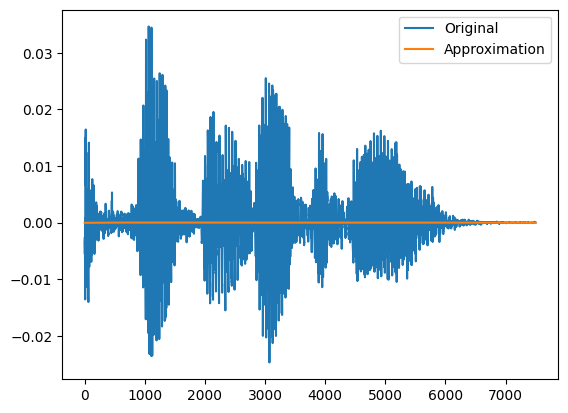

In [15]:
idx = X.index[0]
plt.plot(X.loc[idx], label='Original')
plt.plot(pd.DataFrame(ts_dft_inv, index=X.index).loc[idx], label='Approximation')
#plt.title('Time Series of subject {}: {}'.format(df['individuals'].loc[idx], df['label'].loc[idx].replace('_', ' ')))
plt.legend()

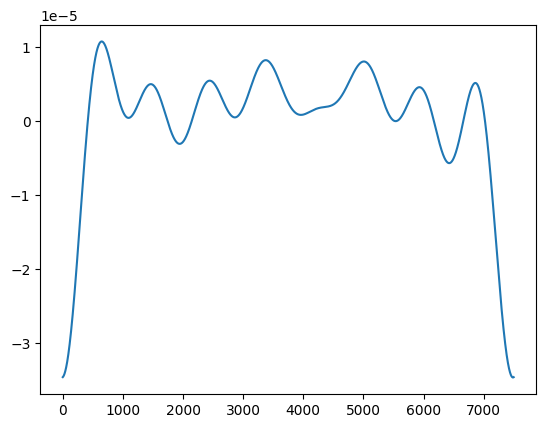

In [16]:
plt.plot(pd.DataFrame(ts_dft_inv, index=X.index).loc[idx])

In [17]:
scaler_MV = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
ts = scaler_MV.fit_transform(X.loc[X.index[0]].values.reshape(1, -1)).ravel()
for i in X.index[1:]:
    ts = np.vstack([ts, scaler_MV.fit_transform(X.loc[i].values.reshape(1, -1)).ravel()])

ts = pd.DataFrame(ts)
ts = X.reset_index(drop = True) #because honestly the MeanVariance scaler lower too much the classification performances

In [ ]:
ts # questo dataset è scalato!

,0,1,2,3,4,5,6,7,8,9,...,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499
0,-0.002741,-0.004028,-0.003936,-0.005226,-0.005576,-0.003187,-0.007555,-0.006972,-0.011311,-0.013576,...,5.566938e-06,4.470849e-06,-1.942201e-06,9.995363e-07,-5.666821e-07,-8.561009e-07,1.181954e-05,5.369515e-06,-0.000002,1.243932e-06
1,0.012635,0.011355,0.008039,0.007772,0.007147,-0.000402,-0.001579,-0.001671,-0.003277,-0.004933,...,-1.079226e-07,-9.134295e-07,9.717014e-06,1.211021e-05,1.889983e-05,6.132631e-06,1.118536e-05,1.839556e-05,0.000014,2.467740e-05
2,-0.003593,-0.002640,-0.001779,0.000881,0.002522,0.002290,0.003123,0.004797,0.005711,0.006030,...,3.105165e-06,8.557031e-07,2.899790e-06,5.690249e-06,1.340168e-06,-6.866558e-07,4.518034e-07,-7.685292e-07,-0.000003,-3.947817e-07
3,0.000199,0.000496,0.001220,0.001211,0.001073,0.001347,0.001371,0.001298,0.001362,0.001899,...,6.558032e-06,1.854917e-05,-3.622803e-07,9.556783e-07,-3.156116e-06,1.483831e-05,3.634218e-05,5.300988e-06,-0.000002,1.528602e-06
4,0.000376,0.001240,0.002325,0.002898,0.003810,0.004524,0.005093,0.005254,0.005134,0.004847,...,3.217041e-04,1.012890e-03,1.419404e-03,1.434023e-03,1.470502e-03,1.408863e-03,1.213357e-03,1.101486e-03,0.000776,3.417099e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,-0.001813,-0.001549,-0.000886,-0.001347,-0.001203,-0.000493,-0.000110,0.000467,0.000611,0.000859,...,-3.257332e-03,-3.864036e-03,-2.521654e-03,-1.269305e-03,-1.900157e-03,-1.495491e-03,1.357733e-03,3.172368e-03,0.002366,2.360569e-03
1824,-0.000647,-0.006970,-0.008432,-0.002954,-0.000605,-0.019904,-0.035147,-0.029280,-0.024951,-0.022599,...,-3.878983e-03,2.606215e-04,3.246022e-03,5.308253e-03,5.865757e-03,5.380979e-03,5.720115e-03,4.063632e-03,0.003288,2.459111e-03
1825,0.031355,0.033521,0.034020,0.026356,0.018655,0.012234,0.002339,-0.009320,-0.018321,-0.017063,...,-1.056025e-03,-4.928421e-04,8.638531e-04,2.389596e-03,3.241050e-03,-2.224421e-05,-3.353799e-03,-3.791726e-03,-0.002850,-2.257006e-03
1826,-0.005413,-0.007673,-0.007686,-0.006905,-0.006564,-0.004590,0.000081,0.002126,0.000948,0.001475,...,3.648051e-02,3.084982e-02,1.906365e-02,3.824015e-03,-1.115406e-02,-2.291956e-02,-2.947808e-02,-2.982216e-02,-0.024422,-1.576621e-02


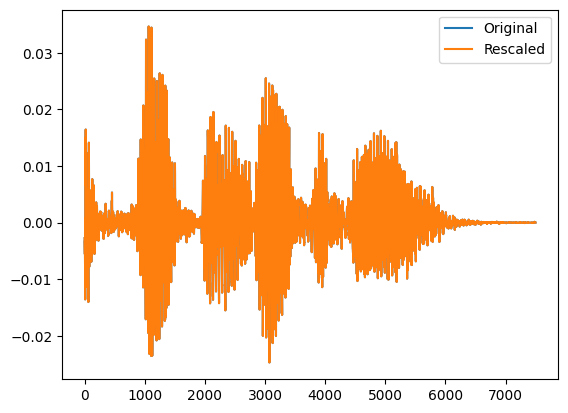

In [18]:
plt.plot(X.values[0], label='Original')
plt.plot(ts.loc[0], label='Rescaled')
plt.legend()

In [ ]:
# FOURIER transform
n_coefs = 20
dft = DiscreteFourierTransform(n_coefs=n_coefs)
ts_dft = dft.fit_transform(ts)
ts_dft_inv = dft_inverse_trasform(ts_dft, n_coefs=n_coefs, n_timestamps=ts.shape[1])

# PAA transform (and inverse transform) of the data
n_paa_segments = 50
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
ts_paa = pd.DataFrame(paa.fit_transform(ts.values).reshape(len(ts), n_paa_segments))
paa_dataset_inv = pd.DataFrame(paa.inverse_transform(ts_paa).reshape(len(ts), len(ts.columns)))

# SAX transform
n_sax_symbols = 50
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
ts_sax = pd.DataFrame(sax.fit_transform(ts).reshape(len(ts), n_paa_segments))
sax_dataset_inv = pd.DataFrame(sax.inverse_transform(ts_sax).reshape(len(ts), len(ts.columns)))

NameError: ignored

(array([-0.03, -0.02, -0.01,  0.  ,  0.01,  0.02,  0.03,  0.04]),
 [Text(0, -0.03, '−0.03'),
  Text(0, -0.019999999999999997, '−0.02'),
  Text(0, -0.009999999999999998, '−0.01'),
  Text(0, 0.0, '0.00'),
  Text(0, 0.010000000000000002, '0.01'),
  Text(0, 0.020000000000000004, '0.02'),
  Text(0, 0.03, '0.03'),
  Text(0, 0.04000000000000001, '0.04')])

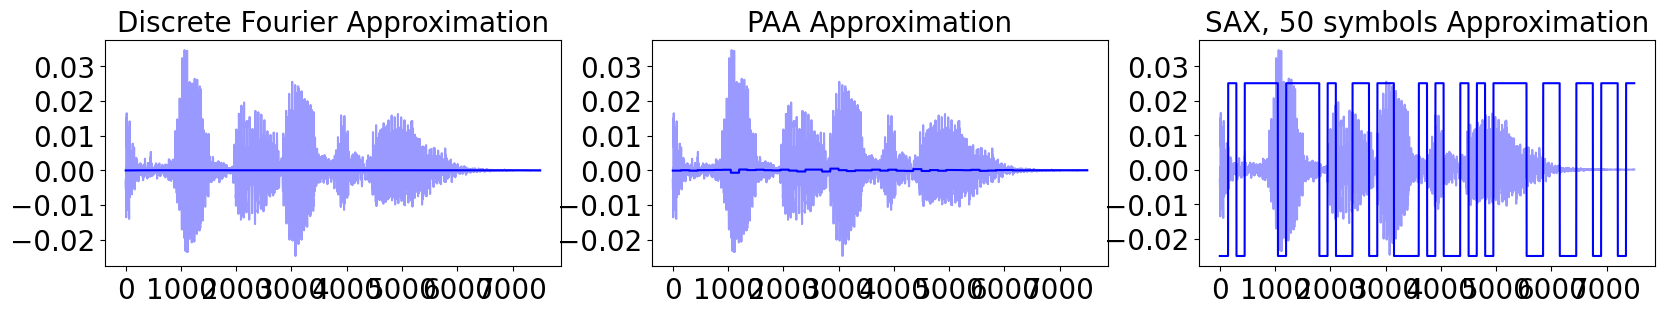

In [ ]:
idxs = 0
plt.figure(figsize=(20,10))

#plt.suptitle(t='A %s Time Series of Subject %s' % (approximated_df['label'].values[idxs].replace('_',' '), approximated_df['individuals'].values[idxs]), fontsize=25)
plt.subplot(3, 3, 1) # PAA
plt.plot(ts.loc[idxs].ravel(), "b-", alpha=0.4)
plt.plot(pd.DataFrame(ts_dft_inv).loc[idxs].ravel(), "b-")
plt.title("Discrete Fourier Approximation", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(3, 3, 2) # PAA
plt.plot(ts.loc[idxs].ravel(), "b-", alpha=0.4)
plt.plot(paa_dataset_inv.loc[idxs].ravel(), "b-")
plt.title("PAA Approximation", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(3, 3, 3)  # SAX
plt.plot(ts.loc[idxs].ravel(), "b-", alpha=0.4)
plt.plot(sax_dataset_inv.loc[idxs].ravel(), "b-")
plt.title("SAX, %d symbols Approximation" % (n_sax_symbols), fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

Clustering

In [ ]:
#labels_for_X = approximated_df['label']
labels_for_X = y_train
#X_clust = approximated_df[[x for x in approximated_df.columns if x not in ['label', 'individuals']]].values
X_clust = X

km = TimeSeriesKMeans(n_clusters=3, metric="euclidean", max_iter=5, random_state=42)
km.fit(X_clust)
print(km)
print(km.cluster_centers_.shape)

TimeSeriesKMeans(max_iter=5, random_state=42)
(3, 7500, 1)


In [ ]:
print(X_clust)

          0         1         2         3         4         5         6     \
0    -0.002741 -0.004028 -0.003936 -0.005226 -0.005576 -0.003187 -0.007555   
1     0.012635  0.011355  0.008039  0.007772  0.007147 -0.000402 -0.001579   
2    -0.003593 -0.002640 -0.001779  0.000881  0.002522  0.002290  0.003123   
3     0.000199  0.000496  0.001220  0.001211  0.001073  0.001347  0.001371   
4     0.000376  0.001240  0.002325  0.002898  0.003810  0.004524  0.005093   
...        ...       ...       ...       ...       ...       ...       ...   
1823 -0.001813 -0.001549 -0.000886 -0.001347 -0.001203 -0.000493 -0.000110   
1824 -0.000647 -0.006970 -0.008432 -0.002954 -0.000605 -0.019904 -0.035147   
1825  0.031355  0.033521  0.034020  0.026356  0.018655  0.012234  0.002339   
1826 -0.005413 -0.007673 -0.007686 -0.006905 -0.006564 -0.004590  0.000081   
1827 -0.000422 -0.002748 -0.001667 -0.000584 -0.001157 -0.001092 -0.000578   

          7         8         9     ...          7490          

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


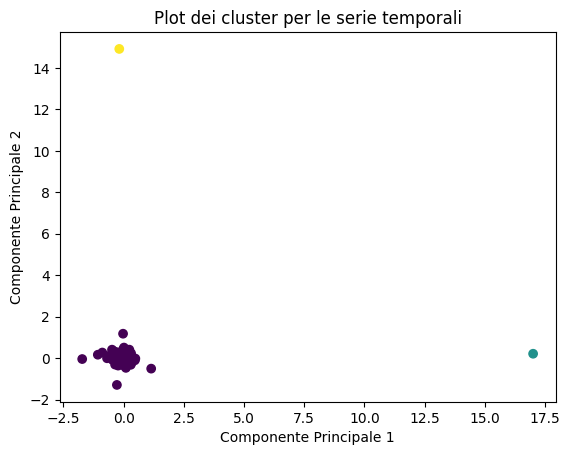

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


# Riduzione dimensionale utilizzando PCA per ottenere due componenti principali
pca = PCA(n_components=2)
dataset_2d = pca.fit_transform(X)

# Algoritmo di clustering (ad esempio, K-Means) per creare i cluster
kmeans = KMeans(n_clusters=3)
kmeans.fit(dataset_2d)
cluster_labels = kmeans.labels_

# Plot dei cluster
plt.scatter(dataset_2d[:, 0], dataset_2d[:, 1], c=cluster_labels)
plt.xlabel('Componente Principale 1')
plt.ylabel('Componente Principale 2')
plt.title('Plot dei cluster per le serie temporali')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


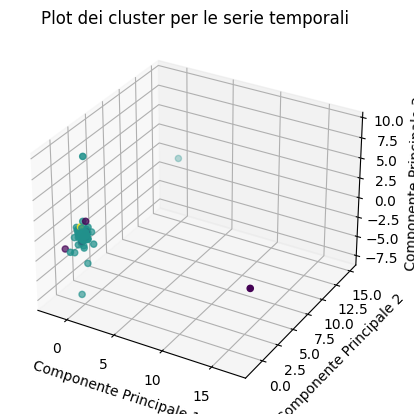

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


# Riduzione dimensionale utilizzando PCA per ottenere tre componenti principali
pca = PCA(n_components=3)
dataset_3d = pca.fit_transform(X)

# Algoritmo di clustering (ad esempio, K-Means) per creare i cluster
kmeans = KMeans(n_clusters=3)
#kmeans.fit(dataset_3d)
kmeans.fit(X)
cluster_labels = kmeans.labels_

# Plot dei cluster in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset_3d[:, 0], dataset_3d[:, 1], dataset_3d[:, 2], c=cluster_labels)
ax.set_xlabel('Componente Principale 1')
ax.set_ylabel('Componente Principale 2')
ax.set_zlabel('Componente Principale 3')
ax.set_title('Plot dei cluster per le serie temporali')
plt.show()


In [ ]:
%%time
inertia=[]
for k in range(2,15):
    kmeans= TimeSeriesKMeans(n_clusters=k, metric='dtw', n_jobs=-1,
                         metric_params={'global_constraint': 'sakoe_chiba', 'sakoe_chiba_radius': 10})
    kmeans.fit(X_sax)
    inertia.append(kmeans.inertia_)
    print('%d cluster: %.2f',k, kmeans.inertia_)

In [ ]:
plt.plot(inertia)
plt.show()

## promemoria! Ricomincia da qui il clustering..

Appunti per il report: la cosa che sto facendo adesso è quella di andare a selezionare il tipo di clustering e soprattutto voglio individuare il numero di k da scegliere.. lo farò tenendo in considerazione SSE perché la DTW è molto complessa computazionalmente da usare e non otterremo grosse differenze.

In [ ]:
X = X_dft


NameError: ignored

In [ ]:
# find best
from tslearn.clustering import silhouette_score
sil=[]
for k in range(2,15):
    kmeans= TimeSeriesKMeans(n_clusters=k, metric='euclidean')
    kmeans.fit(X)
    sil.append(silhouette_score(X, kmeans.labels_, metric='euclidean'))

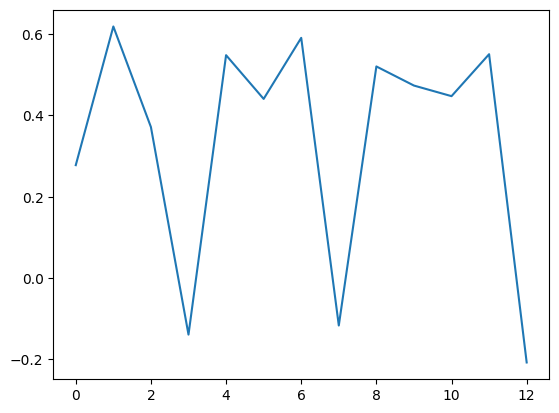

In [ ]:
plt.plot(sil)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

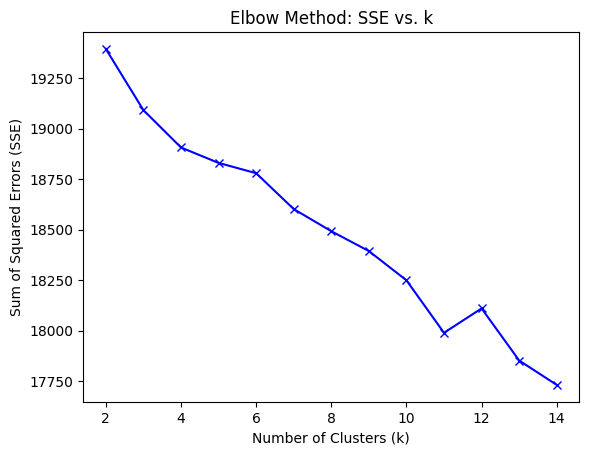

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
k_values = range(2, 15)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)  # SSE

# Plot SSE for each k
plt.plot(k_values, sse, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method: SSE vs. k')
plt.show()


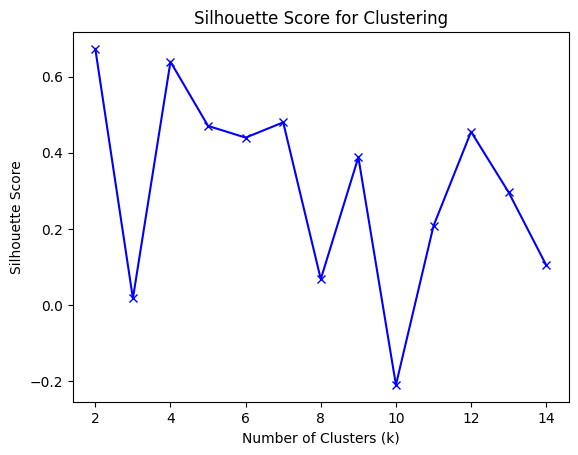

In [ ]:
import numpy as np
from tslearn.clustering import TimeSeriesKMeans
from tslearn.clustering import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []
k_values = range(2, 15)

for k in k_values:
    kmeans = TimeSeriesKMeans(n_clusters=k, metric='euclidean')
    kmeans.fit(X)
    labels = kmeans.labels_
    score = silhouette_score(X, labels, metric='euclidean')
    silhouette_scores.append(score)

# Plot silhouette scores for each k
plt.plot(k_values, silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Clustering')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

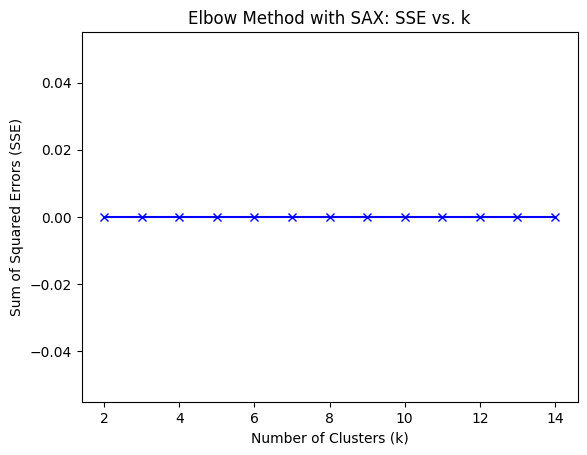

In [ ]:
import numpy as np
from tslearn.piecewise import SymbolicAggregateApproximation
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
k_values = range(2, 15)

for k in k_values:
    sax = SymbolicAggregateApproximation(n_segments=k)
    X_sax = sax.fit_transform(X)

    flattened_X_sax = X_sax.reshape(X_sax.shape[0], -1)

    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(flattened_X_sax)
    sse.append(kmeans.inertia_)  # SSE

# Plot SSE for each k
plt.plot(k_values, sse, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method with SAX: SSE vs. k')
plt.show()


L'andamento di una linea piatta dello SSE intorno allo zero potrebbe indicare che i cluster non sono ben separati o che i dati non presentano una struttura di cluster distintiva. In altre parole, potrebbe non esserci un numero ottimale di cluster ben definito per i dati in questione.

Ciò può accadere quando le time series presentano una grande variabilità all'interno dei cluster o quando i cluster si sovrappongono significativamente tra loro. In tali casi, il metodo del gomito potrebbe non fornire una scelta chiara per il numero di cluster ottimale.

È possibile che l'approssimazione SAX non sia in grado di catturare la struttura di cluster complessa dei tuoi dati multivariati. Pertanto, potrebbe essere necessario esplorare altre tecniche di clustering specifiche per time series multivariate o adottare un approccio diverso per identificare il numero ottimale di cluster, come l'uso di metriche di validità interna o l'analisi visuale dei dati.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

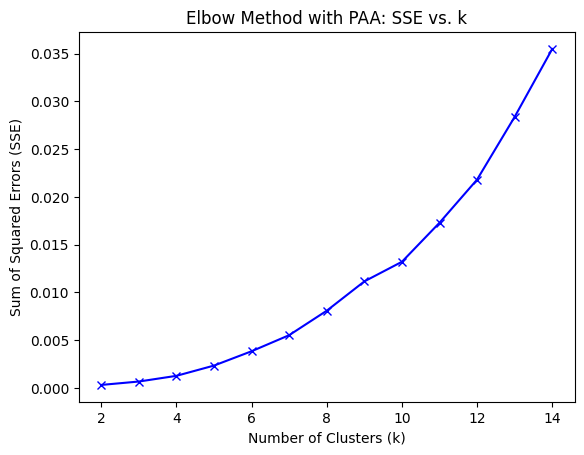

In [ ]:
import numpy as np
from tslearn.piecewise import PiecewiseAggregateApproximation
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
k_values = range(2, 15)

for k in k_values:
    paa = PiecewiseAggregateApproximation(n_segments=k)
    X_paa = paa.fit_transform(X)

    flattened_X_paa = X_paa.reshape(X_paa.shape[0], -1)

    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(flattened_X_paa)
    sse.append(kmeans.inertia_)  # SSE

# Plot SSE for each k
plt.plot(k_values, sse, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method with PAA: SSE vs. k')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

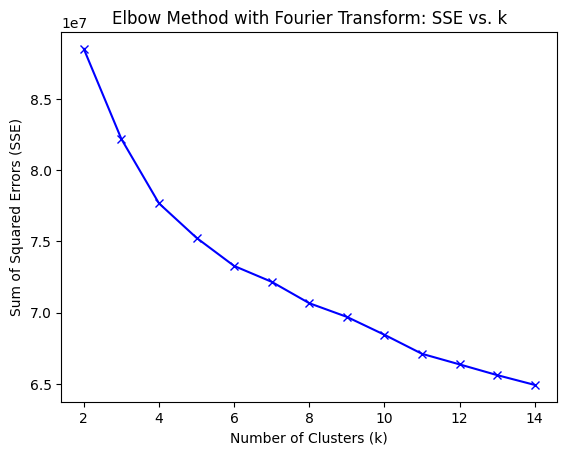

In [ ]:
import numpy as np
from scipy.fft import fft
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
k_values = range(2, 15)

for k in k_values:
    fourier_features = np.abs(fft(X, axis=1))

    flattened_features = fourier_features.reshape(fourier_features.shape[0], -1)

    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(flattened_features)
    sse.append(kmeans.inertia_)  # SSE

# Plot SSE for each k
plt.plot(k_values, sse, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method with Fourier Transform: SSE vs. k')
plt.show()


In [ ]:
X = X_train_cut

In [ ]:
import numpy as np
from tslearn.piecewise import PiecewiseAggregateApproximation
from sklearn.cluster import KMeans

# Approssimazione PAA
paa = PiecewiseAggregateApproximation(n_segments=10)
X_paa = paa.fit_transform(X)

# Flattening
flattened_X_paa = X_paa.reshape(X_paa.shape[0], -1)

# Clustering con K-means
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(flattened_X_paa)

# Etichette dei cluster assegnate ai dati
cluster_labels = kmeans.labels_

# Analisi dei risultati
for i in range(len(cluster_labels)):
    print("Time Series", i, "Cluster:", cluster_labels[i])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Time Series 0 Cluster: 0
Time Series 1 Cluster: 0
Time Series 2 Cluster: 0
Time Series 3 Cluster: 0
Time Series 4 Cluster: 0
Time Series 5 Cluster: 0
Time Series 6 Cluster: 0
Time Series 7 Cluster: 0
Time Series 8 Cluster: 0
Time Series 9 Cluster: 0
Time Series 10 Cluster: 0
Time Series 11 Cluster: 0
Time Series 12 Cluster: 0
Time Series 13 Cluster: 0
Time Series 14 Cluster: 0
Time Series 15 Cluster: 0
Time Series 16 Cluster: 0
Time Series 17 Cluster: 0
Time Series 18 Cluster: 0
Time Series 19 Cluster: 0
Time Series 20 Cluster: 0
Time Series 21 Cluster: 0
Time Series 22 Cluster: 0
Time Series 23 Cluster: 0
Time Series 24 Cluster: 0
Time Series 25 Cluster: 0
Time Series 26 Cluster: 0
Time Series 27 Cluster: 0
Time Series 28 Cluster: 0
Time Series 29 Cluster: 0
Time Series 30 Cluster: 0
Time Series 31 Cluster: 0
Time Series 32 Cluster: 0
Time Series 33 Cluster: 0
Time Series 34 Cluster: 0
Time Series 35 Cluster: 0
Time Series 36 Cluster: 0
Time Series 37 Cluster: 0
Time Series 38 Cluster

In [ ]:
from sklearn.metrics import accuracy_score

# Etichette target del tuo dataset
target_labels = y_train  # Sostituisci y_train con le etichette target effettive

# Calcolo della precisione
accuracy = accuracy_score(target_labels, cluster_labels)
print("Accuracy:", accuracy)


Accuracy: 0.0


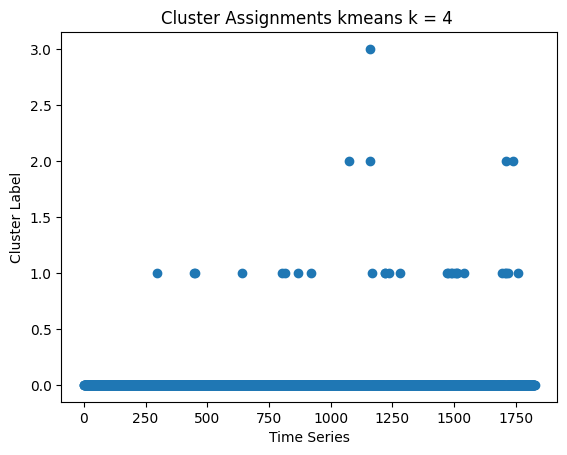

Cluster 0:
   emotion  Count
0     calm    280
1  fearful    278
2      sad    278

Cluster 1:
     emotion  Count
3      angry     11
4      happy      6
5  surprised      3

Cluster 2:
   emotion  Count
6    happy      2
7    angry      1
8  disgust      1

Cluster 3:
  emotion  Count
9   happy      1



In [ ]:
import matplotlib.pyplot as plt

# Grafico delle etichette dei cluster
plt.scatter(range(len(cluster_labels)), cluster_labels)
plt.xlabel('Time Series')
plt.ylabel('Cluster Label')
plt.title('Cluster Assignments kmeans k = 4 ')
plt.show()
# Assumi che cluster_labels sia l'array contenente le etichette dei cluster ottenute dallo spectral clustering con k = 12

# Crea il DataFrame cluster_df con le etichette dei cluster e le corrispondenti etichette vocal_channel ed emotion
cluster_df = pd.DataFrame({'Cluster': cluster_labels, 'emotion': y_train_df_1['emotion']})

# Calcola il conteggio delle occorrenze per ogni combinazione di Cluster, vocal_channel ed emotion
cluster_counts = cluster_df.groupby(['Cluster', 'emotion']).size().reset_index(name='Count')

# Trova le prime 3 occorrenze per ogni cluster considerando "vocal_channel" ed "emotion"
top_occurrences = cluster_counts.groupby('Cluster').apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)

# Stampa le prime 3 occorrenze per ogni cluster
for cluster, occurrence in top_occurrences.groupby('Cluster'):
    print(f"Cluster {cluster}:")
    print(occurrence[['emotion', 'Count']])
    print()

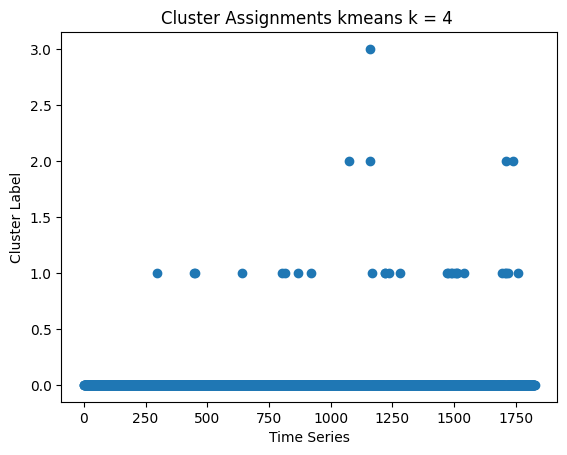

Cluster 0:
  vocal_channel  Count
0        speech   1059
1          song    738

Cluster 1:
  vocal_channel  Count
2        speech     17
3          song      9

Cluster 2:
  vocal_channel  Count
4        speech      3
5          song      1

Cluster 3:
  vocal_channel  Count
6        speech      1



In [ ]:
import matplotlib.pyplot as plt

# Grafico delle etichette dei cluster
plt.scatter(range(len(cluster_labels)), cluster_labels)
plt.xlabel('Time Series')
plt.ylabel('Cluster Label')
plt.title('Cluster Assignments kmeans k = 4 ')
plt.show()
# Assumi che cluster_labels sia l'array contenente le etichette dei cluster ottenute dallo spectral clustering con k = 12

# Crea il DataFrame cluster_df con le etichette dei cluster e le corrispondenti etichette vocal_channel ed emotion
cluster_df = pd.DataFrame({'Cluster': cluster_labels, 'vocal_channel': y_train_df_1['vocal_channel']})

# Calcola il conteggio delle occorrenze per ogni combinazione di Cluster, vocal_channel ed emotion
cluster_counts = cluster_df.groupby(['Cluster', 'vocal_channel']).size().reset_index(name='Count')

# Trova le prime 3 occorrenze per ogni cluster considerando "vocal_channel" ed "emotion"
top_occurrences = cluster_counts.groupby('Cluster').apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)

# Stampa le prime 3 occorrenze per ogni cluster
for cluster, occurrence in top_occurrences.groupby('Cluster'):
    print(f"Cluster {cluster}:")
    print(occurrence[['vocal_channel', 'Count']])
    print()

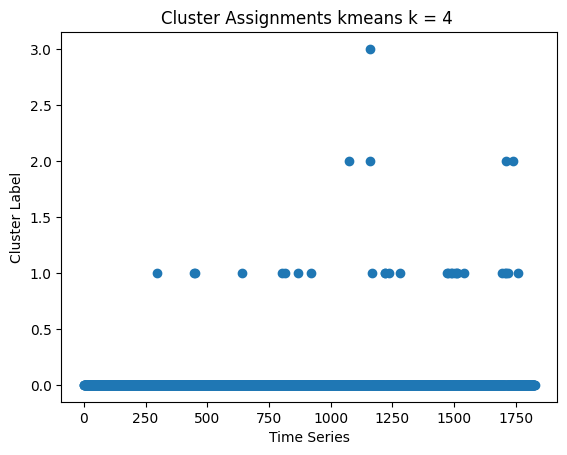

Cluster 0:
  vocal_channel  emotion  Count
0        speech     calm    144
1        speech      sad    143
2        speech  fearful    142

Cluster 1:
  vocal_channel emotion  Count
3        speech   angry      6
4          song   angry      5
5          song   happy      3

Cluster 2:
  vocal_channel  emotion  Count
6          song    happy      1
7        speech    angry      1
8        speech  disgust      1

Cluster 3:
  vocal_channel emotion  Count
9        speech   happy      1



In [ ]:
import matplotlib.pyplot as plt

# Grafico delle etichette dei cluster
plt.scatter(range(len(cluster_labels)), cluster_labels)
plt.xlabel('Time Series')
plt.ylabel('Cluster Label')
plt.title('Cluster Assignments kmeans k = 4 ')
plt.show()
# Assumi che cluster_labels sia l'array contenente le etichette dei cluster ottenute dallo spectral clustering con k = 12

# Crea il DataFrame cluster_df con le etichette dei cluster e le corrispondenti etichette vocal_channel ed emotion
cluster_df = pd.DataFrame({'Cluster': cluster_labels, 'vocal_channel': y_train_df_1['vocal_channel'], 'emotion': y_train_df_1['emotion']})

# Calcola il conteggio delle occorrenze per ogni combinazione di Cluster, vocal_channel ed emotion
cluster_counts = cluster_df.groupby(['Cluster', 'vocal_channel', 'emotion']).size().reset_index(name='Count')

# Trova le prime 3 occorrenze per ogni cluster considerando "vocal_channel" ed "emotion"
top_occurrences = cluster_counts.groupby('Cluster').apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)

# Stampa le prime 3 occorrenze per ogni cluster
for cluster, occurrence in top_occurrences.groupby('Cluster'):
    print(f"Cluster {cluster}:")
    print(occurrence[['vocal_channel', 'emotion', 'Count']])
    print()

In [ ]:
import numpy as np
from sklearn.cluster import KMeans

# Esegui il clustering con K-means sui dati non trasformati
kmeans = KMeans(n_clusters=4, random_state=0)
cluster_labels = kmeans.fit_predict(X)

# Calcola il numero di registrazioni diverse in ciascuna classe/classe di cluster
unique_labels, counts = np.unique(cluster_labels, return_counts=True)

# Stampa il numero di registrazioni diverse per ogni classe/classe di cluster
for label, count in zip(unique_labels, counts):
    print(f"Cluster {label}: {count} registrazioni diverse")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0: 1825 registrazioni diverse
Cluster 1: 1 registrazioni diverse
Cluster 2: 1 registrazioni diverse
Cluster 3: 1 registrazioni diverse


Adesso sto provando con K = 12

In [ ]:
import numpy as np
from tslearn.piecewise import PiecewiseAggregateApproximation
from sklearn.cluster import KMeans

# Approssimazione PAA
paa = PiecewiseAggregateApproximation(n_segments=10)
X_paa = paa.fit_transform(X)

# Flattening
flattened_X_paa = X_paa.reshape(X_paa.shape[0], -1)

# Clustering con K-means
kmeans = KMeans(n_clusters=12, random_state=0)
kmeans.fit(flattened_X_paa)

# Etichette dei cluster assegnate ai dati
cluster_labels = kmeans.labels_

# Analisi dei risultati
for i in range(len(cluster_labels)):
    print("Time Series", i, "Cluster:", cluster_labels[i])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Time Series 0 Cluster: 0
Time Series 1 Cluster: 0
Time Series 2 Cluster: 0
Time Series 3 Cluster: 0
Time Series 4 Cluster: 0
Time Series 5 Cluster: 0
Time Series 6 Cluster: 0
Time Series 7 Cluster: 0
Time Series 8 Cluster: 0
Time Series 9 Cluster: 0
Time Series 10 Cluster: 0
Time Series 11 Cluster: 0
Time Series 12 Cluster: 0
Time Series 13 Cluster: 0
Time Series 14 Cluster: 0
Time Series 15 Cluster: 0
Time Series 16 Cluster: 0
Time Series 17 Cluster: 0
Time Series 18 Cluster: 0
Time Series 19 Cluster: 0
Time Series 20 Cluster: 0
Time Series 21 Cluster: 0
Time Series 22 Cluster: 0
Time Series 23 Cluster: 0
Time Series 24 Cluster: 0
Time Series 25 Cluster: 0
Time Series 26 Cluster: 0
Time Series 27 Cluster: 0
Time Series 28 Cluster: 0
Time Series 29 Cluster: 0
Time Series 30 Cluster: 0
Time Series 31 Cluster: 0
Time Series 32 Cluster: 0
Time Series 33 Cluster: 0
Time Series 34 Cluster: 0
Time Series 35 Cluster: 0
Time Series 36 Cluster: 0
Time Series 37 Cluster: 0
Time Series 38 Cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


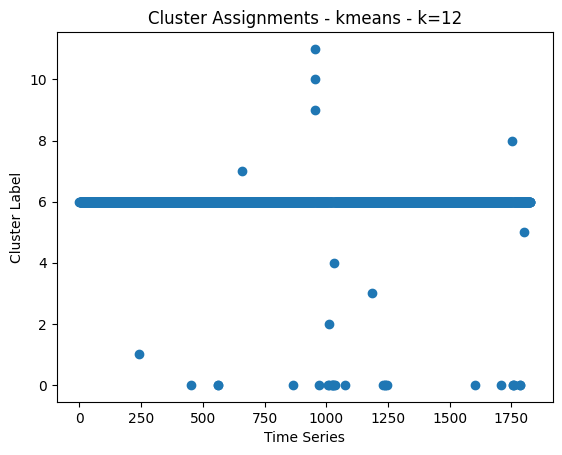

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Esegui il clustering con K-means sui dati non trasformati
kmeans = KMeans(n_clusters=12, random_state=0)
cluster_labels = kmeans.fit_predict(X)

# Grafico delle etichette dei cluster
plt.scatter(range(len(cluster_labels)), cluster_labels)
plt.xlabel('Time Series')
plt.ylabel('Cluster Label')
plt.title('Cluster Assignments - kmeans - k=12')
plt.show()


In [ ]:
import numpy as np
from sklearn.cluster import KMeans

# Esegui il clustering con K-means sui dati non trasformati
kmeans = KMeans(n_clusters=12, random_state=0)
cluster_labels = kmeans.fit_predict(X)

# Calcola il numero di registrazioni diverse in ciascuna classe/classe di cluster
unique_labels, counts = np.unique(cluster_labels, return_counts=True)

# Stampa il numero di registrazioni diverse per ogni classe/classe di cluster
for label, count in zip(unique_labels, counts):
    print(f"Cluster {label}: {count} registrazioni diverse")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0: 24 registrazioni diverse
Cluster 1: 1 registrazioni diverse
Cluster 2: 1 registrazioni diverse
Cluster 3: 1 registrazioni diverse
Cluster 4: 1 registrazioni diverse
Cluster 5: 1 registrazioni diverse
Cluster 6: 1794 registrazioni diverse
Cluster 7: 1 registrazioni diverse
Cluster 8: 1 registrazioni diverse
Cluster 9: 1 registrazioni diverse
Cluster 10: 1 registrazioni diverse
Cluster 11: 1 registrazioni diverse


come altro approccio provo ad usare lo Spectral

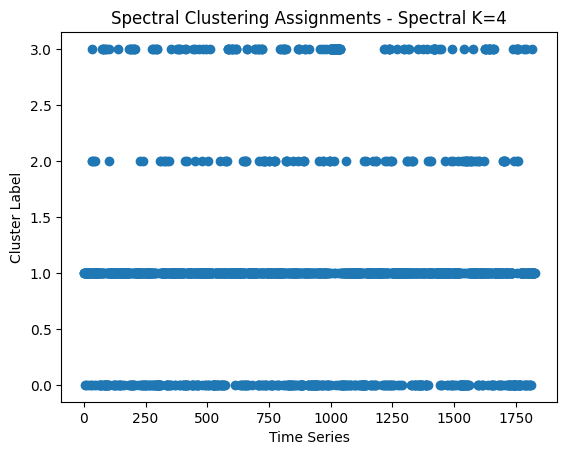

NameError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering

# Applica Spectral Clustering
spectral_clustering = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', random_state=0)
cluster_labels = spectral_clustering.fit_predict(X)

# Grafico delle etichette dei cluster
plt.scatter(range(len(cluster_labels)), cluster_labels)
plt.xlabel('Time Series')
plt.ylabel('Cluster Label')
plt.title('Spectral Clustering Assignments - Spectral K=4')
plt.show()

# Assumi che cluster_labels sia l'array contenente le etichette dei cluster ottenute dallo spectral clustering con k = 12

# Crea il DataFrame cluster_df con le etichette dei cluster e le corrispondenti etichette vocal_channel ed emotion
cluster_df = pd.DataFrame({'Cluster': cluster_labels12, 'vocal_channel': y_train_df_1['vocal_channel']})

# Calcola il conteggio delle occorrenze per ogni combinazione di Cluster, vocal_channel ed emotion
cluster_counts = cluster_df.groupby(['Cluster', 'vocal_channel']).size().reset_index(name='Count')

# Trova le prime 3 occorrenze per ogni cluster considerando "vocal_channel" ed "emotion"
top_occurrences = cluster_counts.groupby('Cluster').apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)

# Stampa le prime 3 occorrenze per ogni cluster
for cluster, occurrence in top_occurrences.groupby('Cluster'):
    print(f"Cluster {cluster}:")
    print(occurrence[['vocal_channel', 'Count']])
    print()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering

# Applica Spectral Clustering
spectral_clustering = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', random_state=0)
cluster_labels = spectral_clustering.fit_predict(X)

# Grafico delle etichette dei cluster
plt.scatter(range(len(cluster_labels)), cluster_labels)
plt.xlabel('Time Series')
plt.ylabel('Cluster Label')
plt.title('Spectral Clustering Assignments - Spectral K=4')
plt.show()

# Assumi che cluster_labels sia l'array contenente le etichette dei cluster ottenute dallo spectral clustering con k = 12

# Crea il DataFrame cluster_df con le etichette dei cluster e le corrispondenti etichette vocal_channel ed emotion
cluster_df = pd.DataFrame({'Cluster': cluster_labels12, 'vocal_channel': y_train_df_1['vocal_channel'], 'emotion': y_train_df_1['emotion']})

# Calcola il conteggio delle occorrenze per ogni combinazione di Cluster, vocal_channel ed emotion
cluster_counts = cluster_df.groupby(['Cluster', 'vocal_channel', 'emotion']).size().reset_index(name='Count')

# Trova le prime 3 occorrenze per ogni cluster considerando "vocal_channel" ed "emotion"
top_occurrences = cluster_counts.groupby('Cluster').apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)

# Stampa le prime 3 occorrenze per ogni cluster
for cluster, occurrence in top_occurrences.groupby('Cluster'):
    print(f"Cluster {cluster}:")
    print(occurrence[['vocal_channel', 'emotion', 'Count']])
    print()


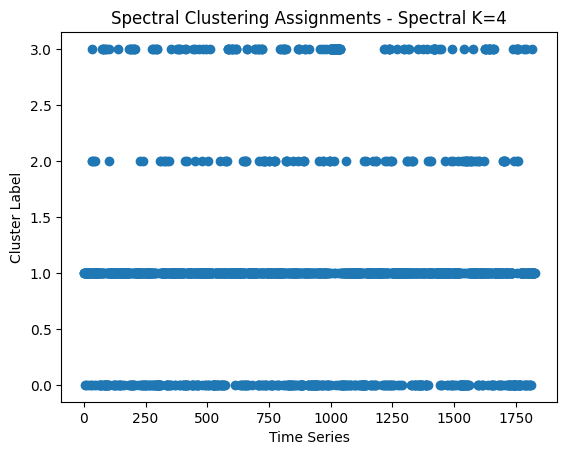

Cluster 0:
  vocal_channel  emotion  Count
0          song    angry     53
1          song  fearful     52
2        speech  fearful     40

Cluster 1:
  vocal_channel    emotion  Count
3        speech    disgust    119
4        speech      happy    109
5        speech  surprised    109

Cluster 2:
  vocal_channel  emotion  Count
6        speech    angry     16
7        speech  fearful     13
8          song    angry     11

Cluster 3:
   vocal_channel  emotion  Count
9           song     calm     35
10          song      sad     30
11          song  fearful     24



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering

# Applica Spectral Clustering
spectral_clustering = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', random_state=0)
cluster_labels = spectral_clustering.fit_predict(X)

# Grafico delle etichette dei cluster
plt.scatter(range(len(cluster_labels)), cluster_labels)
plt.xlabel('Time Series')
plt.ylabel('Cluster Label')
plt.title('Spectral Clustering Assignments - Spectral K=4')
plt.show()

# Assumi che cluster_labels sia l'array contenente le etichette dei cluster ottenute dallo spectral clustering con k = 12

# Crea il DataFrame cluster_df con le etichette dei cluster e le corrispondenti etichette vocal_channel ed emotion
cluster_df = pd.DataFrame({'Cluster': cluster_labels12, 'vocal_channel': y_train_df_1['vocal_channel'], 'emotion': y_train_df_1['emotion']})

# Calcola il conteggio delle occorrenze per ogni combinazione di Cluster, vocal_channel ed emotion
cluster_counts = cluster_df.groupby(['Cluster', 'vocal_channel', 'emotion']).size().reset_index(name='Count')

# Trova le prime 3 occorrenze per ogni cluster considerando "vocal_channel" ed "emotion"
top_occurrences = cluster_counts.groupby('Cluster').apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)

# Stampa le prime 3 occorrenze per ogni cluster
for cluster, occurrence in top_occurrences.groupby('Cluster'):
    print(f"Cluster {cluster}:")
    print(occurrence[['vocal_channel', 'emotion', 'Count']])
    print()


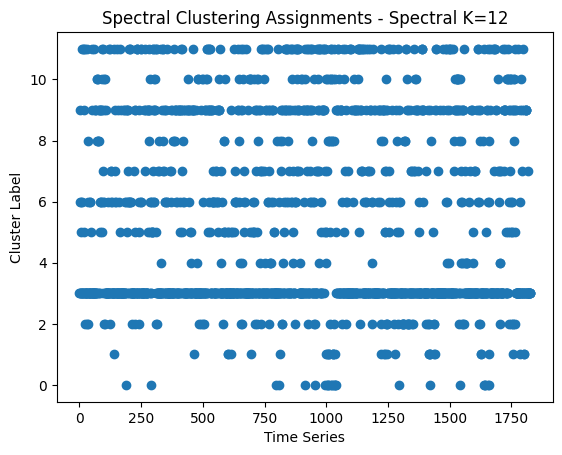

Cluster 0:
  vocal_channel  emotion  Count
0          song      sad     10
1          song  fearful      6
2          song     calm      3

Cluster 1:
  vocal_channel emotion  Count
3          song    calm     10
4          song   angry      6
5          song     sad      5

Cluster 2:
  vocal_channel  emotion  Count
6          song      sad     12
7          song  fearful     11
8          song    angry      8

Cluster 3:
   vocal_channel    emotion  Count
9         speech    disgust     95
10        speech  surprised     94
11        speech      happy     92

Cluster 4:
   vocal_channel  emotion  Count
12        speech    angry      6
13        speech  fearful      5
14        speech     calm      4

Cluster 5:
   vocal_channel emotion  Count
15          song     sad     13
16          song   angry     11
17          song    calm      6

Cluster 6:
   vocal_channel  emotion  Count
18        speech  fearful     19
19        speech    angry     13
20          song      sad     12

Clus

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering

# Applica Spectral Clustering
spectral_clustering = SpectralClustering(n_clusters=12, affinity='nearest_neighbors', random_state=0)
cluster_labels = spectral_clustering.fit_predict(X)

# Grafico delle etichette dei cluster
plt.scatter(range(len(cluster_labels)), cluster_labels)
plt.xlabel('Time Series')
plt.ylabel('Cluster Label')
plt.title('Spectral Clustering Assignments - Spectral K=12')
plt.show()

# Assumi che cluster_labels sia l'array contenente le etichette dei cluster ottenute dallo spectral clustering con k = 12

# Crea il DataFrame cluster_df con le etichette dei cluster e le corrispondenti etichette vocal_channel ed emotion
cluster_df = pd.DataFrame({'Cluster': cluster_labels, 'vocal_channel': y_train_df_1['vocal_channel'], 'emotion': y_train_df_1['emotion']})

# Calcola il conteggio delle occorrenze per ogni combinazione di Cluster, vocal_channel ed emotion
cluster_counts = cluster_df.groupby(['Cluster', 'vocal_channel', 'emotion']).size().reset_index(name='Count')

# Trova le prime 3 occorrenze per ogni cluster considerando "vocal_channel" ed "emotion"
top_occurrences = cluster_counts.groupby('Cluster').apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)

# Stampa le prime 3 occorrenze per ogni cluster
for cluster, occurrence in top_occurrences.groupby('Cluster'):
    print(f"Cluster {cluster}:")
    print(occurrence[['vocal_channel', 'emotion', 'Count']])
    print()


In [ ]:
y_train_df_1 = y_train_df.drop(['modality', 'filename'], axis=1)


In [ ]:
y_train_df_1

,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex
0,speech,neutral,normal,Kids are talking by the door,1st,1,M
1,speech,neutral,normal,Kids are talking by the door,2nd,1,M
2,speech,neutral,normal,Dogs are sitting by the door,1st,1,M
3,speech,neutral,normal,Dogs are sitting by the door,2nd,1,M
4,speech,calm,normal,Kids are talking by the door,1st,1,M
...,...,...,...,...,...,...,...
1823,speech,surprised,normal,Dogs are sitting by the door,2nd,18,F
1824,speech,surprised,strong,Kids are talking by the door,1st,18,F
1825,speech,surprised,strong,Kids are talking by the door,2nd,18,F
1826,speech,surprised,strong,Dogs are sitting by the door,1st,18,F


In [ ]:
# Conta le occorrenze di ciascuna etichetta per ogni cluster
cluster_counts = cluster_df.groupby(['Cluster', y_train_df_1.columns[0]]).size().reset_index(name='Count')

# Trova le etichette più frequenti per ogni cluster
top_labels = cluster_counts.groupby('Cluster').apply(lambda x: x.nlargest(1, 'Count')).reset_index(drop=True)

# Stampa le etichette più frequenti per ogni cluster
for cluster, label, count in zip(top_labels['Cluster'], top_labels[y_train_df_1.columns[0]], top_labels['Count']):
    print(f"Cluster {cluster}: Etichetta {label} ({count} occorrenze)")


NameError: ignored

In [ ]:
# Trova le prime 3 occorrenze per ogni cluster
top_occurrences = cluster_counts.groupby('Cluster').apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)

# Stampa le prime 3 occorrenze per ogni cluster
for cluster, occurrence in top_occurrences.groupby('Cluster'):
    print(f"Cluster {cluster}:")
    print(occurrence)
    print()


Cluster 0:
   Cluster vocal_channel  Count
0        0        speech    240
1        0          song    200

Cluster 1:
   Cluster vocal_channel  Count
2        1        speech    751
3        1          song    374

Cluster 2:
   Cluster vocal_channel  Count
4        2        speech     64
5        2          song     41

Cluster 3:
   Cluster vocal_channel  Count
6        3          song    133
7        3        speech     25



In [ ]:
# Reimposta l'indice di cluster_counts
cluster_counts = cluster_counts.reset_index()

# Unisci i DataFrame cluster_counts e y_train_df_1
cluster_df = pd.concat([cluster_counts, y_train_df_1], axis=1)

# Trova le prime 3 occorrenze per ogni cluster considerando "vocal_channel" e "emotion"
top_occurrences = cluster_df.groupby('Cluster').apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)

# Stampa le prime 3 occorrenze per ogni cluster
for cluster, occurrence in top_occurrences.groupby('Cluster'):
    print(f"Cluster {cluster}:")
    print(occurrence[['vocal_channel', 'emotion', 'Count']])
    print()


Cluster 0.0:
  vocal_channel vocal_channel  emotion  Count
0        speech        speech  neutral  240.0
1          song        speech  neutral  200.0

Cluster 1.0:
  vocal_channel vocal_channel  emotion  Count
2        speech        speech  neutral  751.0
3          song        speech  neutral  374.0

Cluster 2.0:
  vocal_channel vocal_channel emotion  Count
4        speech        speech    calm   64.0
5          song        speech    calm   41.0

Cluster 3.0:
  vocal_channel vocal_channel emotion  Count
6          song        speech    calm  133.0
7        speech        speech    calm   25.0



In [ ]:
# Assumi che cluster_labels sia l'array contenente le etichette dei cluster ottenute dallo spectral clustering con k = 12

# Crea il DataFrame cluster_df con le etichette dei cluster e le corrispondenti etichette vocal_channel ed emotion
cluster_df = pd.DataFrame({'Cluster': cluster_labels12, 'vocal_channel': y_train_df_1['vocal_channel'], 'emotion': y_train_df_1['emotion']})

# Calcola il conteggio delle occorrenze per ogni combinazione di Cluster, vocal_channel ed emotion
cluster_counts = cluster_df.groupby(['Cluster', 'vocal_channel', 'emotion']).size().reset_index(name='Count')

# Trova le prime 3 occorrenze per ogni cluster considerando "vocal_channel" ed "emotion"
top_occurrences = cluster_counts.groupby('Cluster').apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)

# Stampa le prime 3 occorrenze per ogni cluster
for cluster, occurrence in top_occurrences.groupby('Cluster'):
    print(f"Cluster {cluster}:")
    print(occurrence[['vocal_channel', 'emotion', 'Count']])
    print()


Cluster 0:
  vocal_channel  emotion  Count
0          song    angry     53
1          song  fearful     52
2        speech  fearful     40

Cluster 1:
  vocal_channel    emotion  Count
3        speech    disgust    119
4        speech      happy    109
5        speech  surprised    109

Cluster 2:
  vocal_channel  emotion  Count
6        speech    angry     16
7        speech  fearful     13
8          song    angry     11

Cluster 3:
   vocal_channel  emotion  Count
9           song     calm     35
10          song      sad     30
11          song  fearful     24



provo a fare la visualizzazione richiesta dal prof

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


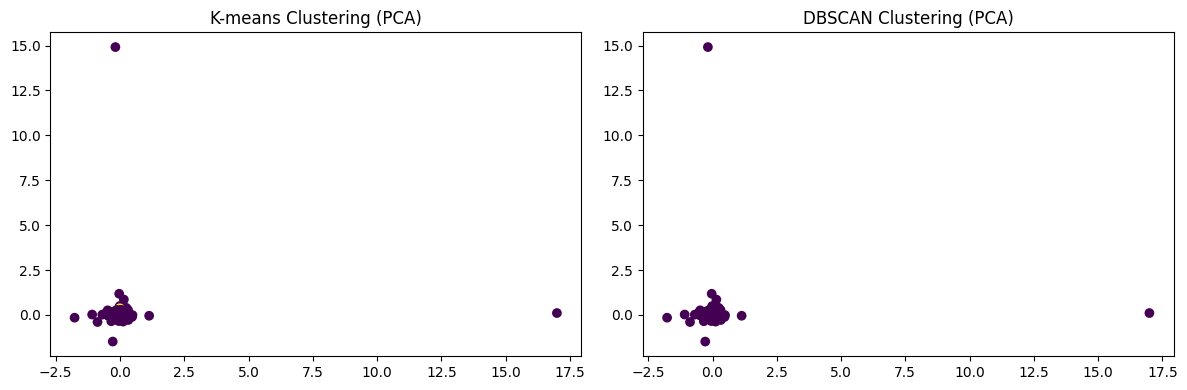

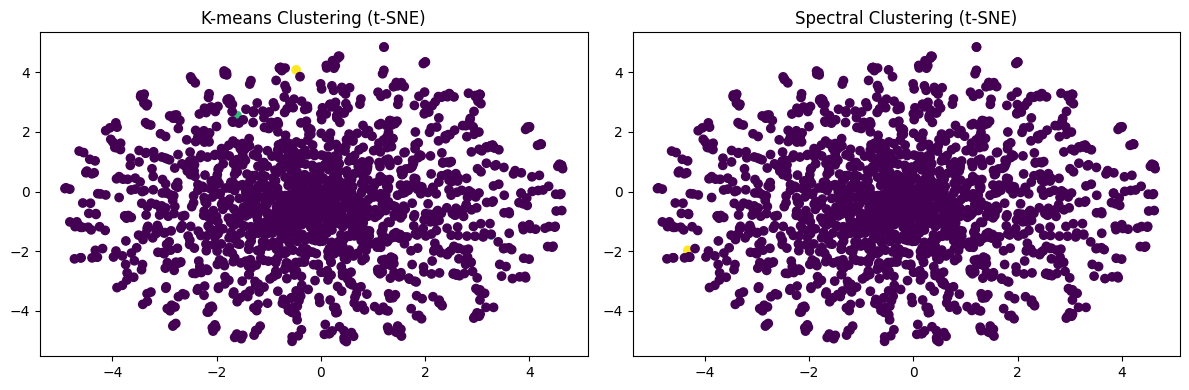

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering

# Applica la riduzione delle dimensioni con PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)

# Applica la riduzione delle dimensioni con t-SNE
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(X)

# Esegui il clustering con K-means
kmeans = KMeans(n_clusters=4)
kmeans_labels = kmeans.fit_predict(X)

# Esegui il clustering con DBSCAN
dbscan = DBSCAN()
dbscan_labels = dbscan.fit_predict(X)

# Esegui il clustering con Spectral Clustering
spectral = SpectralClustering(n_clusters=4)
spectral_labels = spectral.fit_predict(X)

# Plotta il grafico utilizzando PCA
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels)
plt.title("K-means Clustering (PCA)")

plt.subplot(1, 2, 2)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=dbscan_labels)
plt.title("DBSCAN Clustering (PCA)")

plt.tight_layout()
plt.show()

# Plotta il grafico utilizzando t-SNE
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=kmeans_labels)
plt.title("K-means Clustering (t-SNE)")

plt.subplot(1, 2, 2)
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=spectral_labels)
plt.title("Spectral Clustering (t-SNE)")

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'DBSCAN Clustering (PCA)')

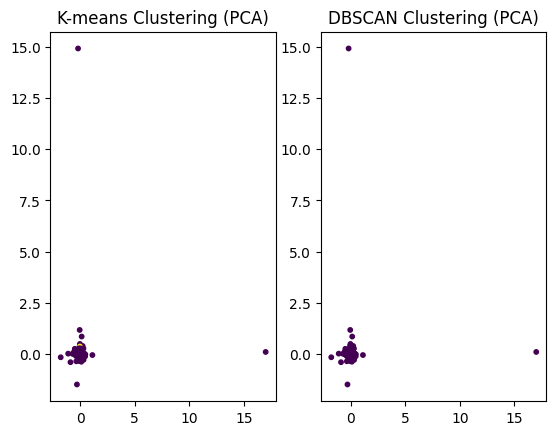

In [ ]:
# Plotta il grafico utilizzando PCA con punti più piccoli
plt.subplot(1, 2, 1)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels, s=10)
plt.title("K-means Clustering (PCA)")

plt.subplot(1, 2, 2)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=dbscan_labels, s=10)
plt.title("DBSCAN Clustering (PCA)")


Text(0.5, 1.0, 'Spectral Clustering (t-SNE)')

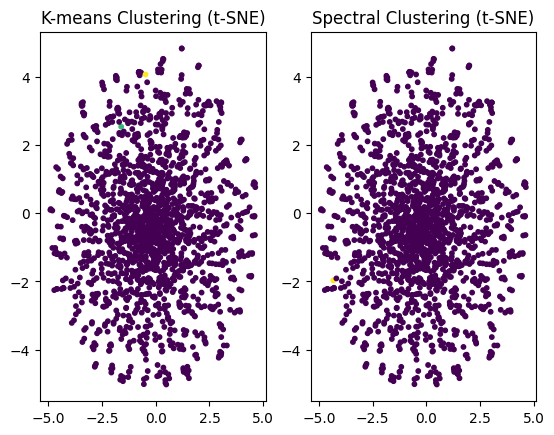

In [ ]:
# Plotta il grafico utilizzando t-SNE con punti più piccoli
plt.subplot(1, 2, 1)
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=kmeans_labels, s=10)
plt.title("K-means Clustering (t-SNE)")

plt.subplot(1, 2, 2)
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=spectral_labels, s=10)
plt.title("Spectral Clustering (t-SNE)")


In [ ]:
!pip install fastdtw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=517933 sha256=d1f2d34b82b46778f4a4ec1863ec10767bc06df9ab99a451f17aca684bb46d84
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw


In [ ]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.metrics import dtw
from fastdtw import fastdtw
import numpy as np

# Definizione di una funzione di distanza personalizzata utilizzando la DTW
def dtw_distance(x, y):
    _, dist = fastdtw(x, y)
    return dist

# Creazione dell'istanza del clustering con la metrica DTW
kmeans_dtw = TimeSeriesKMeans(n_clusters=4, metric=dtw_distance)

# Addestramento del clustering con la metrica DTW
kmeans_dtw.fit(X)


ValueError: ignored

In [ ]:
from tslearn.metrics import dtw_path
from sklearn.cluster import AgglomerativeClustering

# Calcola la matrice di distanza DTW tra tutte le coppie di time series
distance_matrix = np.zeros((len(X), len(X)))
for i in range(len(X)):
    for j in range(i + 1, len(X)):
        _, dist = dtw_path(X[i], X[j])
        distance_matrix[i, j] = dist
        distance_matrix[j, i] = dist

# Esegui il clustering utilizzando l'algoritmo Hierarchical Agglomerative Clustering
hac = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='average')
labels = hac.fit_predict(distance_matrix)


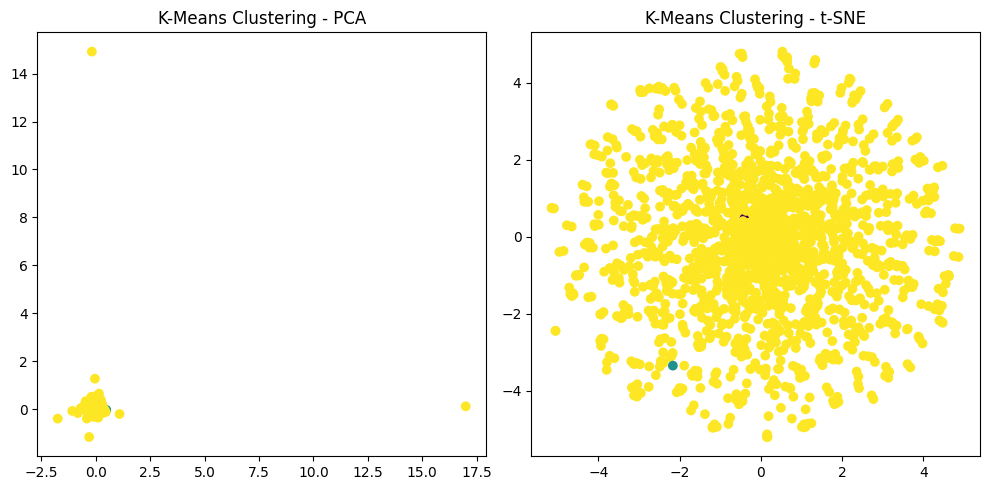

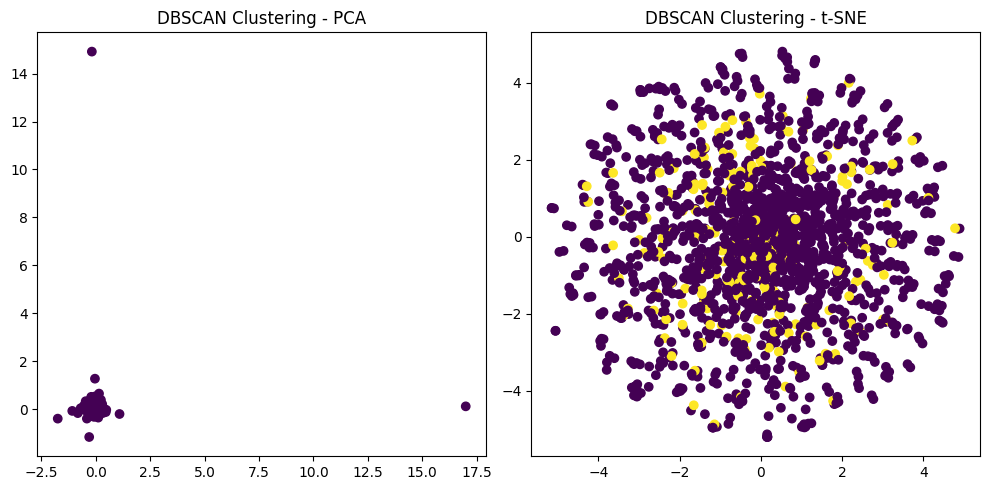

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets

# Algoritmo di clustering K-Means con distanza euclidea
kmeans = TimeSeriesKMeans(n_clusters=3, metric='euclidean')
kmeans_labels = kmeans.fit_predict(X)

# Algoritmo di clustering DBSCAN con distanza euclidea
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)

# Riduzione dimensionale con PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)

# Riduzione dimensionale con t-SNE
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(X)

# Plot dei cluster ottenuti con K-Means
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels)
plt.title('K-Means Clustering - PCA')

plt.subplot(1, 2, 2)
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=kmeans_labels)
plt.title('K-Means Clustering - t-SNE')

plt.tight_layout()
plt.show()

# Plot dei cluster ottenuti con DBSCAN
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=dbscan_labels)
plt.title('DBSCAN Clustering - PCA')

plt.subplot(1, 2, 2)
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=dbscan_labels)
plt.title('DBSCAN Clustering - t-SNE')

plt.tight_layout()
plt.show()


In [ ]:
#normalizz
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series # Normalizza una riga
ts_norm = scaler.fit_transform(X.reshape(1,-1))
ts_norm.shape

(1, 13710000, 1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from sklearn.decomposition import PCA

# Supponiamo che tu abbia il tuo dataset di time series chiamato X con shape (1828, 7000)
# E il tuo target set chiamato y con shape (1828,)


# Riduzione delle dimensioni utilizzando PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(ts_norm)

# Creazione di un oggetto TimeSeriesKMeans per il clustering
kmeans = TimeSeriesKMeans(n_clusters=3, metric="euclidean", max_iter=10)

# Fit del modello sulle time series ridimensionate
kmeans.fit(X_scaled)

# Ottenimento delle etichette di cluster
labels = kmeans.labels_

# Plot delle time series colorate per cluster in 2D utilizzando PCA
plt.figure(figsize=(10, 8))
for i, ts in enumerate(X_pca):
    plt.scatter(ts[0], ts[1], c=plt.cm.Set1(labels[i] / 3.))
plt.title('Clustering delle Time Series (PCA)')
plt.show()


ValueError: ignored

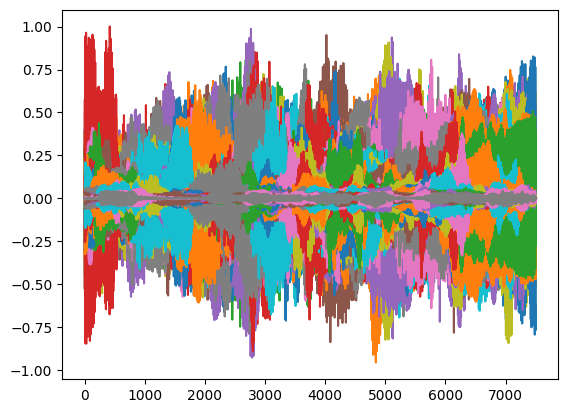

In [ ]:
plt.plot(np.squeeze(X).T)
plt.show()

In [ ]:
km = TimeSeriesKMeans(n_clusters=3, metric="euclidean",
                      max_iter=5, random_state=0)
km.fit(X)

TimeSeriesKMeans(max_iter=5, random_state=0)

In [ ]:
km.cluster_centers_.shape

(3, 7500, 1)

In [ ]:
np.squeeze(km.cluster_centers_).T

array([[ 1.46714474e-05, -1.76214875e-02,  6.23949128e-03],
       [-3.32829009e-05, -1.53289860e-02,  9.22892869e-03],
       [ 1.04880868e-05, -8.59252082e-03,  1.48157961e-02],
       ...,
       [ 3.55092607e-04,  2.41793665e-03,  4.07683748e-01],
       [ 2.62697263e-04,  1.51437406e-03,  1.41677852e-01],
       [-1.09021978e-03,  2.89147371e-03,  2.01164124e-01]])

In [ ]:
np.squeeze(km.cluster_centers_).T
plt.show()

In [ ]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


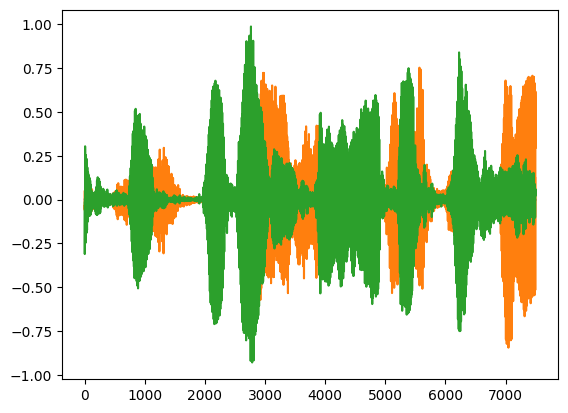

In [ ]:
km_skl = KMeans(n_clusters=3, max_iter=5, random_state=0)
km_skl.fit(np.squeeze(X))

plt.plot(np.squeeze(km_skl.cluster_centers_).T)
plt.show()

In [ ]:
km_skl.cluster_centers_.shape

(3, 7500)

In [ ]:
# DEVI CONTINUARE CON I CLUSTER, IN SOSTANZA è MOLTO CONFUSO
# MA DEVO SCEGLIERE DUE METODI E BASTA. E RICORDARMI DI USARE
# LA PCA PER PLOTTARE IL TUTTO .

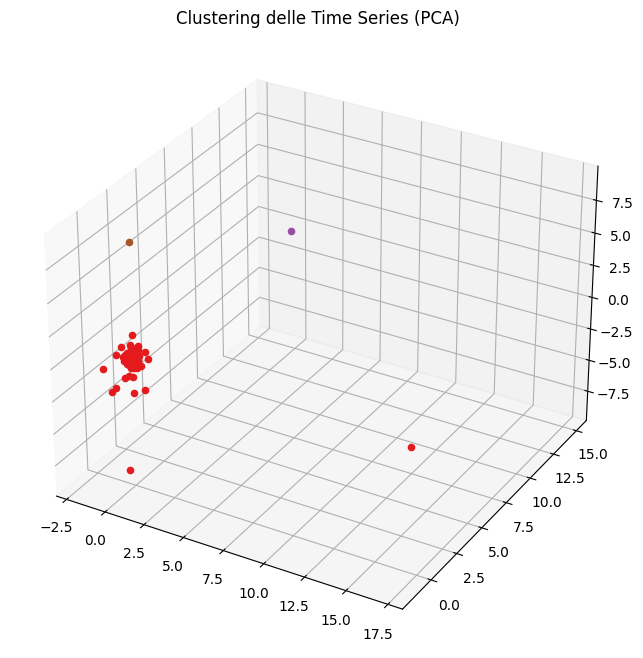

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from sklearn.decomposition import PCA

# Supponiamo che tu abbia il tuo dataset di time series chiamato X con shape (1828, 7000)
# E il tuo target set chiamato y con shape (1828,)

# Ridimensionamento delle time series
scaler = TimeSeriesScalerMeanVariance()
X_scaled = scaler.fit_transform(X)

# Riduzione delle dimensioni utilizzando PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Creazione di un oggetto TimeSeriesKMeans per il clustering
kmeans = TimeSeriesKMeans(n_clusters=3, metric="euclidean", max_iter=10)

# Fit del modello sulle time series ridotte
kmeans.fit(X_pca)

# Ottenimento delle etichette di cluster
labels = kmeans.labels_

# Plot delle time series colorate per cluster in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for i, ts in enumerate(X_pca):
    ax.scatter(ts[0], ts[1], ts[2], c=plt.cm.Set1(labels[i] / 3.))
ax.set_title('Clustering delle Time Series (PCA)')
plt.show()


In [ ]:
#SHAPELETS

In a shapelet classification task, the target set (y_train) is typically created by assigning a class label to each time series in the training set based on its shapelet characteristics. The shapelet characteristics are learned during the training phase using a shapelet-based algorithm such as the LearningShapelets algorithm
1
2
. Once the shapelets have been learned, each time series in the training set is transformed into a feature vector that represents its similarity to each of the learned shapelets. The class label for each time series is then assigned based on its similarity to the shapelets and the known class labels for the training set.
To create a target set from a numpy array of time series records, you first need to split your dataset into training and testing sets using the train_test_split() function from the sklearn library
3
4
. Once you have split your dataset, you can use a shapelet-based algorithm such as the LearningShapelets algorithm to learn the shapelets from the training set and create the target set based on the class labels for the training set
1
2
. Finally, you can use the learned shapelets and the target set to classify the time series in the testing set.

In [ ]:
# Il primo problema quindi per la shapelet è legato a indivuare il training set. Per fare ciò vado a crearmelo facendo il learning
# come esprime il pezzo di articolo che ho copiato sopra.

Nel contesto dell'algoritmo di apprendimento dei shapelet (LearningShapelets), i `window_sizes` rappresentano le dimensioni delle finestre utilizzate per estrarre i shapelet dai dati temporali.

Un shapelet è una sotto-sequenza di un dato temporale che è rappresentativo di una specifica classe o pattern. La dimensione di un shapelet viene definita dalla sua lunghezza, che corrisponde alla dimensione della finestra temporale in cui viene cercato il shapelet.

Nell'esempio che hai fornito, `window_sizes=[16, 32, 64]`, viene specificato un insieme di tre dimensioni di finestre: 16, 32 e 64. Questo significa che l'algoritmo LearningShapelets cercherà shapelet di queste dimensioni all'interno dei dati temporali per apprendere i pattern rilevanti per la classificazione.

In pratica, l'algoritmo esplorerà tutte le possibili finestre con le dimensioni specificate e cercherà il shapelet che massimizza la discriminazione tra le classi. Questi shapelet saranno utilizzati per costruire un modello di classificazione basato sulla distanza o altre metriche tra i shapelet e le istanze dei dati temporali.

Scegliere le dimensioni delle finestre appropriate dipende dal contesto del problema e dalla natura dei dati temporali. Dimensioni diverse possono rivelare pattern di diverse scale temporali. Spesso è utile provare diverse dimensioni delle finestre per determinare quelle che funzionano meglio per la classificazione dei dati specifici.

In [ ]:
import pyts.transformation
from sklearn.model_selection import train_test_split


In [ ]:

# Learn the shapelets from the training set
ls = LearningShapelets()

/usr/local/lib/python3.10/dist-packages/tslearn/shapelets/shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


In [ ]:



# Learn the shapelets from the training set
#ls = LearningShapelets(n_shapelets=3, window_sizes=[16, 32, 64])
ls.fit(X_train, y_train)

# Create the target set for the training set
y_train_pred = ls.predict(X_train)

# Print the target set for the training set
print(y_train_pred)

NameError: ignored

In [ ]:
Xv = X.values

In [ ]:
n_ts, ts_sz = Xv.shape
n_classes = len(set(y_train))
n_classes = 10


# Set the number of shapelets per size as done in the original paper
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.1,
                                                       r=1)

print('n_ts', n_ts)
print('ts_sz', ts_sz)
print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes)

n_ts 1828
ts_sz 7500
n_classes 10
shapelet_sizes {750: 8}


In [ ]:
# Define the model using parameters provided by the authors (except that we use
# fewer iterations here)
shp_clf = LearningShapelets(n_shapelets_per_size=shapelet_sizes,
                        optimizer="sgd",
                        weight_regularizer=.1,
                        max_iter=1,
                        verbose=1, scale=False)

In [ ]:
shp_clf.fit(Xv, y_train)

8/8 [==============================] - 392s 45s/step - loss: 0.8244 - binary_accuracy: 0.4108 - binary_crossentropy: 0.6941


LearningShapelets(max_iter=1, n_shapelets_per_size={750: 8}, verbose=1,
                  weight_regularizer=0.1)

In [ ]:
predicted_labels = shp_clf.predict(Xv)
print("Correct classification rate:", accuracy_score(y, predicted_labels))

In [ ]:
predicted_locations = shp_clf.locate(Xv)

NameError: ignored

In [ ]:
plt.figure(figsize=(10,8))
ts_id = 0
n_shapelets = sum(shapelet_sizes.values())
plt.title("{} Extracted Shapelet Matches".format(n_shapelets), fontsize=20)

shapelets_adjusted = np.array([shp_clf.shapelets_[n].ravel() for n in range(4)])
scostamento = 0.2
scale_shape = TimeSeriesScalerMinMax([Xv[ts_id].min()+scostamento, Xv[ts_id].max()-scostamento]).fit_transform(shapelets_adjusted)

plt.plot(Xv[ts_id].ravel())
for idx_shp, shp in enumerate(scale_shape):
    shp = shp + shapelets_adjusted[idx_shp].mean()*0.4
    t0 = predicted_locations[ts_id, idx_shp]
    plt.plot(np.arange(t0, t0 + len(shp)), shp, linewidth=2)
#plt.xlabel('Total Acceleration Z-Axis', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [ ]:
new_X = shp_clf.transform(Xv)

X_test = Xdf_test.sample(n=number_of_records, random_state=42).values
X_test = shp_clf.transform(X_test)
y_test = [1 if _ == 6 else 0 for _ in y_test_multi]


X_train, X_valid, y_train, y_valid = train_test_split(new_X, y, test_size=0.3, random_state=0)

In [ ]:
for clf in [DecisionTreeClassifier(max_depth=8, random_state=42), KNeighborsClassifier(n_neighbors=5, metric='euclidean', weights='uniform'), KNeighborsClassifier(n_neighbors=5, metric='dtw', weights='uniform'), KNeighborsClassifier(n_neighbors=5, metric='dtw_sakoechiba', weights='uniform'), KNeighborsClassifier(n_neighbors=5, metric='dtw_itakura', weights='uniform')]:
    classifier_str = str(clf)[:str(clf).find('(')]
    print(classifier_str, end=' ')
    if classifier_str != 'DecisionTreeClassifier':
        print('Metric =', str(clf)[str(clf).find('metric=')+len('metric='):str(clf).rfind(', weights')], end=' ')
    print()
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    y_score = clf.predict_proba(X_test)

    print('Accuracy %s' % accuracy_score(y_test, y_pred))
    print('F1-score %s' % f1_score(y_test, y_pred, average=None))
    print(classification_report(y_test, y_pred))


    fpr, tpr, _ = roc_curve(y_test, y_score[:,1])

    print(auc(fpr, tpr))
    print()

In [ ]:
prova = pd.DataFrame(train_set_array)
prova

,0,1,2,3,4,5,6,7,8,9,...,38028,38029,38030,38031,38032,38033,38034,38035,38036,38037
0,8.386923e-08,-2.924419e-07,5.272880e-07,-8.932308e-07,1.672662e-06,2.803810e-06,-1.471164e-07,2.930077e-06,3.219613e-06,3.002710e-06,...,1.349738e-319,-1.272466e-319,-3.248976e-319,3.409053e-321,4.607557e-319,9.723212e-321,-2.674921e-319,-3.887605e-319,1.147072e-319,-2.522699e-320
1,-2.978562e-08,-1.401316e-06,-1.013950e-05,-8.966593e-06,-3.628661e-08,-4.428392e-06,-4.177636e-06,-3.055351e-06,-8.925080e-06,-2.429517e-06,...,4.639770e-320,-1.170540e-319,-6.570085e-320,-3.241071e-320,9.851669e-320,-2.067171e-320,-5.678593e-319,2.382879e-320,1.655861e-319,-6.778087e-320
2,2.977816e-05,2.642960e-05,2.792839e-05,3.585964e-05,2.926376e-05,1.616374e-05,1.108042e-05,1.948379e-05,2.823109e-05,1.919158e-05,...,2.423738e-319,3.380051e-319,-1.186005e-319,-6.406055e-320,1.347119e-319,1.189710e-320,1.429727e-319,8.332911e-320,-2.104720e-321,-9.338829e-320
3,3.035490e-05,2.516304e-06,3.707888e-05,2.030241e-05,-6.659642e-06,1.173001e-05,2.039782e-05,2.918540e-06,-2.816713e-06,3.041800e-06,...,-2.457137e-319,9.777065e-320,2.515436e-319,3.490426e-319,3.709395e-319,2.185944e-319,-1.093515e-319,1.788765e-319,3.569476e-319,5.011802e-320
4,3.015393e-05,-4.793966e-06,1.374216e-06,-3.326954e-07,-7.442917e-07,7.139548e-07,-1.024175e-06,6.464534e-07,-3.648900e-07,1.140490e-07,...,5.471579e-319,1.107596e-319,9.021145e-320,2.585940e-320,-2.131893e-320,1.270934e-319,-6.338862e-320,-1.007746e-319,1.925275e-319,-3.794424e-321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,1.839941e-08,-2.491045e-08,2.557955e-08,-1.751993e-08,-2.838495e-10,2.564744e-08,-5.258712e-08,7.160824e-08,-7.289656e-08,5.150644e-08,...,-8.871443e-320,3.140775e-320,-2.118059e-319,3.385486e-319,-3.170666e-319,-3.479704e-319,2.660198e-319,8.410974e-320,-1.159325e-319,-2.152595e-319
1824,4.360604e-08,3.022369e-08,-1.125262e-07,2.445316e-07,-2.993058e-07,2.732259e-07,3.870800e-08,-1.363486e-06,-2.566076e-06,-4.297832e-06,...,1.214957e-319,3.482026e-319,2.309065e-319,3.767942e-319,-5.345790e-320,-3.262760e-319,6.762276e-320,2.656986e-319,-5.794402e-320,5.946080e-320
1825,3.317559e-08,-5.241922e-08,6.101579e-08,-5.241371e-08,2.518677e-08,1.579319e-08,-6.806395e-08,1.444402e-07,-1.969569e-07,2.321431e-07,...,-1.375380e-319,-1.779624e-320,5.317134e-320,1.445784e-319,2.361634e-320,7.452980e-320,7.914536e-319,3.533854e-319,-4.530878e-319,6.774134e-320
1826,1.042319e-11,-7.574328e-12,8.747767e-13,9.028098e-12,-2.009979e-11,2.902096e-11,-3.177794e-11,2.474891e-11,-6.124941e-12,-2.267996e-11,...,-1.306112e-319,-6.499187e-319,4.564673e-320,2.301259e-319,-5.790943e-320,6.520678e-320,1.168959e-319,-1.081361e-319,-2.561829e-319,1.859021e-319


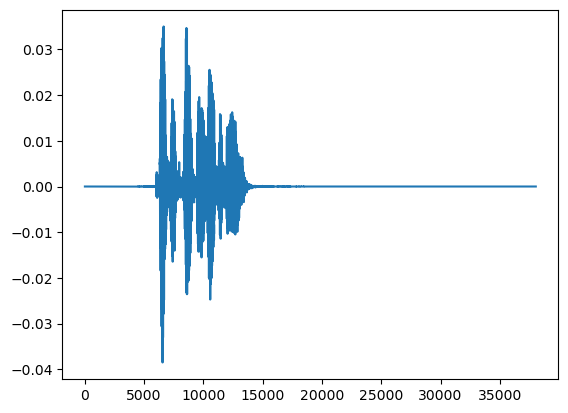

In [ ]:
#questa è relativa a 03-01-01-01-01-01-01.wav
ts0 = train_set_array[0]
plt.plot(ts0)
plt.show()

## Trasformation

### Transformation I: Offset Translation

Io direi che non è necessario applicare questa trasformazione perché essendo registrazioni i valori sull'asse delle y non sappresentno range di valori differenti. Se la applicassi andrei a modificare di troppo il mio dataset inutilmente.

In [ ]:
#mi creo una copia del vettore X_train cosi da salvare solo le trasformazioni di volta in volta
ts_offs = X_train[:]

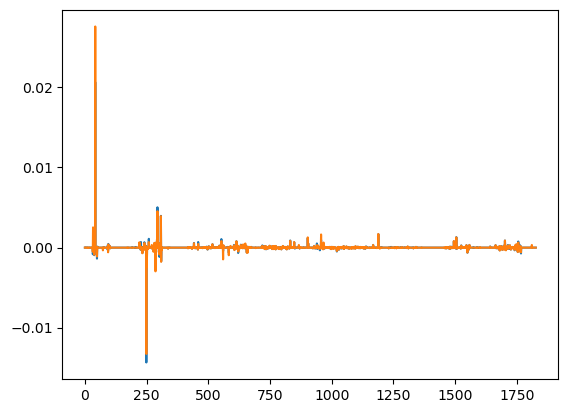

In [ ]:
ts_off=[]
for i in range(0,1828,1):
    ts_offs.T[i] = (ts_offs.T[i] - ts_offs.T[i].mean())

plt.plot(ts_offs.T[0])
plt.plot(ts_offs.T[1])

plt.show()

### Transformation II: Amplitude Scaling

Di conseguenza a quanto detto precedentemente anche qui non attuerei nessuna trasformazione. Come è facile notare perdo molti dati e le registrazioni sono stare registrate appunto usando la stessa distanza, gli stessi strumenti..ecc.

In [ ]:
ts_ampl=X_train[:] #copio il dataframe senza modificare l'originale per poi salvare l'amplitude Scaling

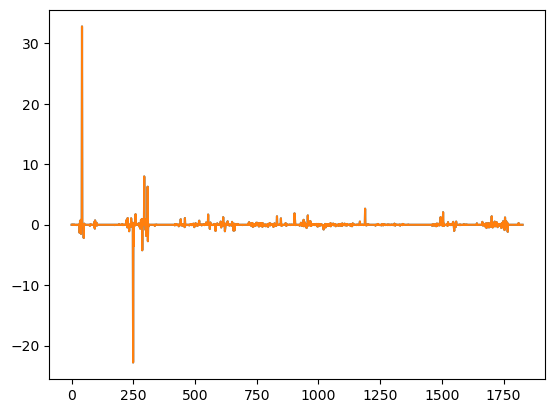

In [ ]:
for i in range(0,1828,1):
    ts_ampl.T[i]=(ts_ampl.T[i] - ts_ampl.T[i].mean())/ts_ampl.T[i].std()

plt.plot(ts_ampl.T[0])
plt.plot(X_train.T[0]) #in arancione, i suoi valori erano nell'intorno dello 0 e ora sono molto amplificati
plt.show()

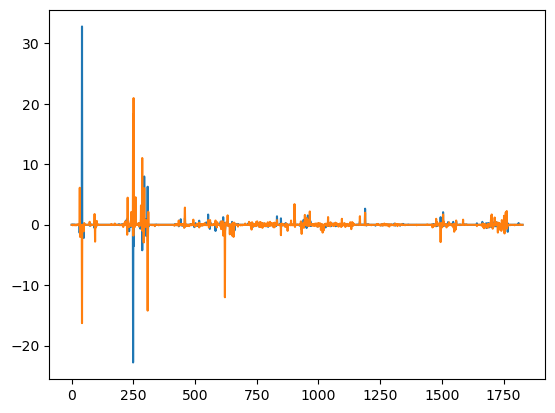

In [ ]:
plt.plot(ts_ampl.T[0]) #blu
plt.plot(ts_ampl.T[1200]) #arancione
plt.show()

### Transformation IV: Noise (smoothing)


A quanto pare il nostro dataset delle ts risulta non avere troppo rumore infatti altrimenti si appiattisce tantissimo... più che altro questo algoritmo liscia le TS facendo la media dei valori che sono vicini e noi abbiamo delle registrazioni vocali con valori molto vicini quindi non conviene applicare questa trasformazione che va ad appiattire troppo il dataset di ts.

In [ ]:
ts_noismot = X_train[:]

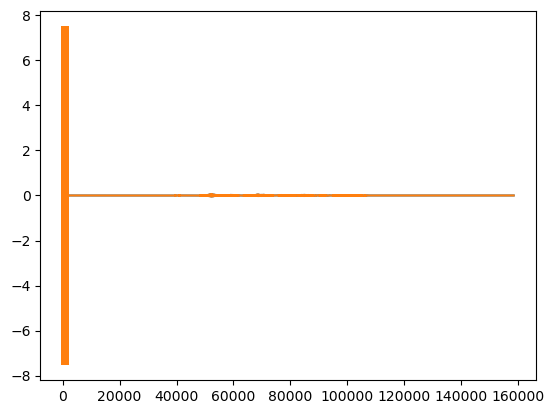

In [ ]:
ts_noise = []
w_noise = 10
for i in range(0, 1828, 1):
    ts_noismot.T[i] = ((ts_noismot.T[i].mean()) / (ts_noismot.T[i].std()))
    ts_noismot.T[i] = np.convolve(ts_noismot.T[i], np.ones(w_noise) / w_noise, mode='same')
    ts_noise.append(((X_train[i] - X_train[i].mean()) / X_train[i].std()))
    ts_noise[i] = np.convolve(ts_noise[i], np.ones(w_noise) / w_noise, mode='same')

plt.plot(ts_ampl[0])
plt.plot(ts_noismot[0])
plt.show()

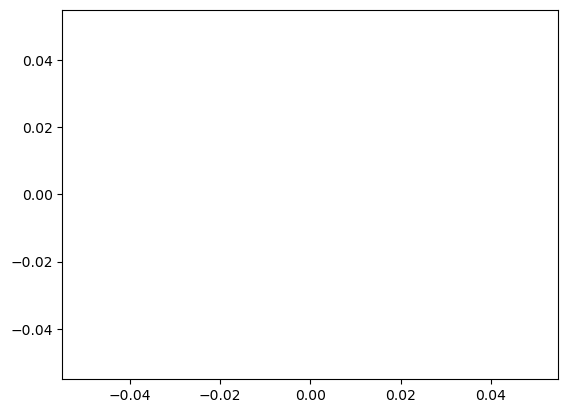

In [ ]:
plt.plot(ts_noise[5])
plt.plot(ts_noise[1300])
plt.show()

### Transformation III: Trend removal

Anche questa trasfomazione risulta inutile perché essendo registrazioni vocali non ci sono trend da dover rimuovere

In [ ]:
ts_trend_values = X_train[:]

In [ ]:
ts_trend = pd.DataFrame(ts_trend_values)

In [ ]:
df_X_train = pd.DataFrame(X_train)

In [ ]:
#ts_shift=[]
#for i in range(0,1828,1):    # calcola il rolling e prende la media per usarla come trend
#    ts_trend.T[i] = ts_trend.T[i] - ts_trend.T[i].rolling(window=12).mean()
#    ts_shift.append(df_X_train[i] - df_X_train[i].rolling(window=12).mean()) # rimuove il trend
#plt.plot(ts_trend.T[0])
#plt.plot(ts_trend.T[1])
#plt.show()

In [ ]:
plt.plot(ts_shift[0])
plt.plot(ts_shift[1])
plt.show()

## Features Extraction

In [ ]:
#SE DAL DATASET DELLE TIMESERIES VOGLIAMO LAVORARE CON LE FATURES:

import numpy as np
import scipy.stats as stats

from tsfresh.feature_extraction import extract_features
from tsfresh.feature_extraction import ComprehensiveFCParameters

In [ ]:
# lavoro con una Series di pandas e non con un vettore
df_X_train = pd.DataFrame(X_train)

In [ ]:
def calculate_features(values):
    features = {
        'avg': np.mean(values),
        'std': np.std(values),
        'var': np.var(values),
        'med': np.median(values),
        '10p': np.percentile(values, 10),
        '25p': np.percentile(values, 25),
        '50p': np.percentile(values, 50),
        '75p': np.percentile(values, 75),
        '90p': np.percentile(values, 90),
        'iqr': np.percentile(values, 75) - np.percentile(values, 25),
        'cov': 1.0 * np.mean(values) / np.std(values),
        'skw': stats.skew(values),
        'kur': stats.kurtosis(values)
    }

    return features

In [ ]:
features = calculate_features(df_X_train[0])
features

{'avg': 1.3221382569038793e-05,
 'std': 0.0006237171460307218,
 'var': 3.8902307825270875e-07,
 'med': 2.4308175286551885e-231,
 '10p': -5.187667965561329e-05,
 '25p': -4.851136726640766e-08,
 '50p': 2.4308175286551885e-231,
 '75p': 2.8251675335108186e-07,
 '90p': 6.11644525060248e-05,
 'iqr': 3.3102812061748954e-07,
 'cov': 0.02119772184102754,
 'skw': 12.987889325163765,
 'kur': 777.3994512968306}

## Approximations (TS Dimensionality_Reduction)

### Trasformazione di Fourier

In [ ]:
from pyts.approximation import DiscreteFourierTransform # consigliata se la Time Series presenta una forma naturale, altrimenti usi la PAA

In [ ]:
n_coefs = 64
dft = DiscreteFourierTransform(n_coefs=n_coefs)
ts1_dft = dft.fit_transform(X_train.reshape(1, -1)) # trasforma da una colonna a una riga e 64 colonne

In [ ]:
ts1_dft = pd.DataFrame(ts1_dft)
ts1_dft

In [ ]:
#Inverse Transform
ts1_dft_inv = dft_inverse_trasform(ts1_dft, n_coefs=n_coefs, n_timestamps=len(ts1.values))
ts1_dft_inv

In [ ]:
plt.plot(ts1_dft.ravel()) # timeseries dopo la trasformazione di fourier ma prima di fare l'inverso
plt.show

In [ ]:
plt.plot(ts1.ravel()) # originale
plt.plot(ts1_dft_inv.ravel()) # dopo l'approssimazione di Fourier invertita
plt.show()

### Trasformazione SVD

In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
svd = TruncatedSVD(n_components=2) # numero di componenti che gli passi
ts1_svd = svd.fit_transform(ts1.values.reshape(1, -1))
#ts_svd = svd.fit_transform(np.array([ts.values.reshape(1, -1)[0],
#                                     ts.values.reshape(1, -1)[0]]))

In [ ]:
ts1_svd_inv = svd.inverse_transform(ts1_svd)[0]
ts1_svd_inv

In [ ]:
plt.plot(ts1.ravel()) # per una sigola time series ottieni una sovrapposizione perfetta

plt.plot(ts1_svd_inv.ravel())
plt.show()

## -- Più utilizzate --

### PieceAggregateApproximation (PAA)

In [ ]:
from tslearn.piecewise import PiecewiseAggregateApproximation # Questa è consigliata se la TS non ha una forma naturale, altrimenti usi la Trasformazione di Fourier
from tslearn.piecewise import SymbolicAggregateApproximation
from tslearn.piecewise import OneD_SymbolicAggregateApproximation
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

In [ ]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series # Normalizza una riga
ts0 = X_train[0]
ts1 = X_train[1]
ts2 = X_train[2]
ts0 = scaler.fit_transform(ts0.reshape(1,-1))
ts1 = scaler.fit_transform(ts1.reshape(1,-1))
ts2 = scaler.fit_transform(ts2.reshape(1,-1))

In [ ]:
# PAA transform (and inverse transform) of the data
n_paa_segments = 10                                         # sarebbe quella che nelle slides chiama "N" ( e a lezione"k")
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
ts0_paa = paa.fit_transform(ts0)                              # fit transform
#paa_dataset_inv = ts    # inverse transform
#paa_dataset_inv = paa.inverse_transform(ts0_paa)
# il codice mi dava errore perciò considerando che concettualmente sono la stessa cosa, io ho sostituito l'inversa
# della trasformata con una copia del vettore di train originale!

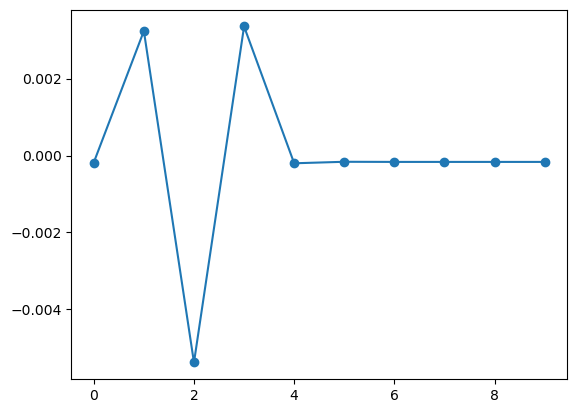

In [ ]:
plt.plot(ts0_paa.ravel(), marker='o')  # se ha un andamento decrescente ci fa capire che ha un trend decrescente
plt.show()                             # se ha un andamento crescente ci fa capire che ha un trend crescente
                                        # i punti rappresentano i valori medio dei 10 punti (n_paa_segments) che approssimano
                                        # la time series

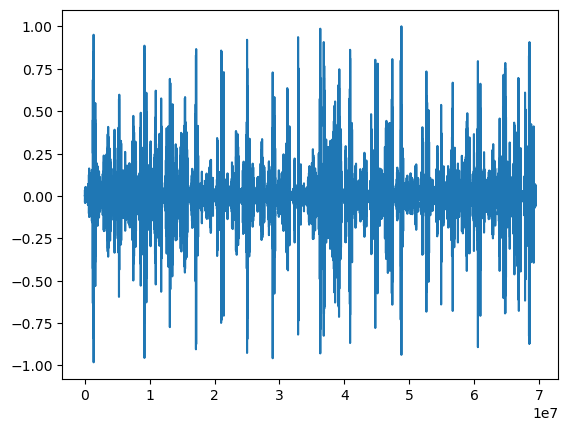

In [ ]:
plt.plot(paa_dataset_inv.ravel()) # qui vediamo la l'inverse trasformation e ogni box
plt.show()                     # ogni box ha come valore quelli dati da print(ts0_paa)

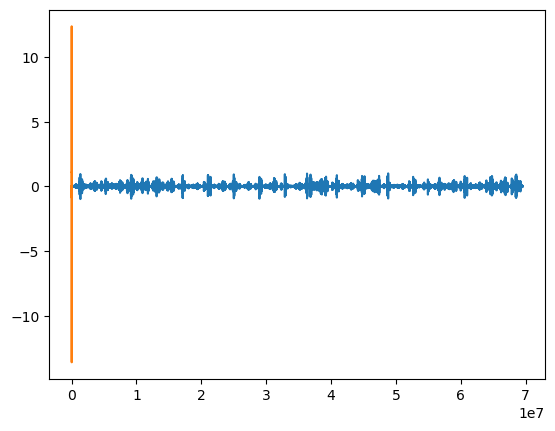

In [ ]:
# Se sovrapponiamo alla precedente, l'originale
plt.plot(paa_dataset_inv.ravel()) # qui vediamo la l'inverse trasformation e ogni box # questa è la ricostruzione dopo la compressione
plt.plot(ts0.ravel()) # l'originale
plt.show()

### Symbolic Aggregate Approximation (SAX)

In [ ]:
#ts= X_train[:]
#ts.T[1] #con la trasposta vado a considerara l'intera riga, Serie Temp.

In [ ]:
#normalizz
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series # Normalizza una riga
ts_norm = scaler.fit_transform(X_train.reshape(1,-1))
ts_norm.shape

(1, 69533464, 1)

In [ ]:
#SAX
n_sax_symbols = 10
sax = SymbolicAggregateApproximation(n_segments=100,  #numero di segmenti
                                     alphabet_size_avg=n_sax_symbols) # parametro grandezza alfabeto
ts_sax_norm=sax.fit_transform(ts_norm)
# ts_sax_inv = sax.inverse_transform(ts_sax_norm)
#ts_sax_inv = ts

In [ ]:
ts_sax_norm.shape

(1, 100, 1)

In [ ]:
plt.plot(ts_norm[0], label='grezza')
plt.plot(ts_sax_inv[0], label='SAX')
plt.legend(loc='best')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

In [ ]:
# mostro differenza tra PAA e SAX
plt.plot(paa_dataset_inv.ravel())
plt.plot(sax_dataset_inv.ravel()) # nota ogni segmento del PAA corrisponde a un numero di SAX (perché abbaimo usato lo stesso numero di componenti)
plt.show()

In [ ]:
plt.figure()
plt.subplot(2, 2, 1)  # First, raw time series
plt.plot(ts0[0].ravel(), "b-")
plt.title("Raw time series")

plt.subplot(2, 2, 2)  # Second, PAA
plt.plot(ts0[0].ravel(), "b-", alpha=0.4)
plt.plot(paa_dataset_inv[0].ravel(), "b-")
plt.title("PAA")

plt.subplot(2, 2, 3)  # Then SAX
plt.plot(ts0[0].ravel(), "b-", alpha=0.4)
plt.plot(sax_dataset_inv[0].ravel(), "b-")
plt.title("SAX, %d symbols" % n_sax_symbols)

plt.subplot(2, 2, 4)  # Finally, 1d-SAX
plt.plot(ts0[0].ravel(), "b-", alpha=0.4)
plt.plot(one_d_sax_dataset_inv[0].ravel(), "b-")
plt.title("1d-SAX, %d symbols"
          "(%dx%d)" % (n_sax_symbols_avg * n_sax_symbols_slope,
                       n_sax_symbols_avg,
                       n_sax_symbols_slope))

plt.tight_layout()
plt.show()

#### PAA vs SAX

In [ ]:
# PAA

ts1_paa = paa.fit_transform(ts1)
ts2_paa = paa.fit_transform(ts2)

In [ ]:
plt.plot(paa.inverse_transform(ts1_paa)[0].ravel())
plt.plot(paa.inverse_transform(ts2_paa)[0].ravel())
plt.show()

In [ ]:
# SAX

ts1_sax = sax.fit_transform(ts1)
ts2_sax = sax.fit_transform(ts2)

In [ ]:
plt.plot(sax.inverse_transform(ts1_sax)[0].ravel())
plt.plot(sax.inverse_transform(ts2_sax)[0].ravel())
plt.show()

# Clustering

## TimeSeriesKMeans

In [ ]:
from tslearn.clustering import TimeSeriesKMeans # ti permette di usare il tipo distanza che vuoi (euclidian,...)
from tslearn.generators import random_walks
from sklearn.metrics import silhouette_score
from tqdm import tqdm

In [ ]:
# Run KMeans and plot the results to choose best K
def get_kmeans_results(data, max_clusters=15, metric='dtw', n_jobs=-1):
    sse = []
    silhouette = []
    clusters_range = range(2, max_clusters+1)

    for K in tqdm(clusters_range):
        kmeans_model = TimeSeriesKMeans(n_clusters=K, metric=metric, n_jobs=n_jobs, max_iter=10, random_state=42)
        kmeans_model.fit(data)
        sse.append(kmeans_model.inertia_)
        silhouette.append(silhouette_score(data, kmeans_model.labels_))

# Visualization
    plt.figure(figsize=(10,4))
    plt.plot(clusters_range, sse, 'bx-')
    plt.xlabel('k')
    plt.ylabel('SSE')
    plt.title('Elbow Method')

    plt.figure(figsize=(10,4))
    plt.plot(clusters_range[0:], silhouette, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Silhouette score')
    plt.title('Silhouette');

In [ ]:
#da utilizzare in caso di SAX fornendo il numero di segmenti come numero di cols
ts_sax_norm=ts_sax_norm.reshape(7352,32)
ts_sax_norm

array([[5, 4, 5, 4, 5, 5, 4, 4, 5, 5, 5, 5, 5, 4, 5, 4, 4, 5, 4, 4, 4, 4,
        5, 4, 4, 4, 4, 4, 4, 5, 5, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 5, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 4, 5, 4, 5, 5, 4, 4, 4, 5, 4, 4,
        5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 4, 4, 5, 4, 5, 5, 4, 5,
        5, 5, 4, 4, 5, 4, 5, 5, 5, 4, 4, 5]])

In [ ]:
%%time
X=ts_sax_norm
get_kmeans_results(data=X, max_clusters=10, metric='euclidean', n_jobs=-1)

  0%|                                                     | 0/9 [00:00<?, ?it/s]


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [ ]:
#X=total_acc_z_train
km = TimeSeriesKMeans(n_clusters=6, metric="dtw", max_iter=10, random_state=42) # distanza euclidea
km.fit(X)

TimeSeriesKMeans(max_iter=10, metric='dtw', n_clusters=6, random_state=42)

In [ ]:
#DISTRIBUZIONE CLASSI NEI CLUSTER
pclass_xt = pd.crosstab(km.labels_, y_train[0])
pclass_xt

NameError: name 'y_train' is not defined

In [ ]:
#conteggio TS per cluster
unique, counts = np.unique(km.labels_, return_counts=True)
dict(zip(unique, counts))

In [ ]:
#PLOT CENTROIDI
#sp_names = ['1', '2', '3','4','5','6']
#plt.legend(labels=sp_names, title="Clusters", fontsize = 10)
plt.figure(figsize=(8,7))
plt.plot(np.squeeze(km.cluster_centers_).T)
plt.title('Centroids', size=15)
plt.xlabel("Number of records", size=15)
plt.ylabel("Values", size=15)
plt.show()

In [ ]:
print('SSE: ',km.inertia_)
print('Silhouette score: ',silhouette_score(body_gyro_z_train, km.labels_))

## Approximated Clustering

In [ ]:
n_paa_segments = 10
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
ts_paa = paa.fit_transform(ts_norm)

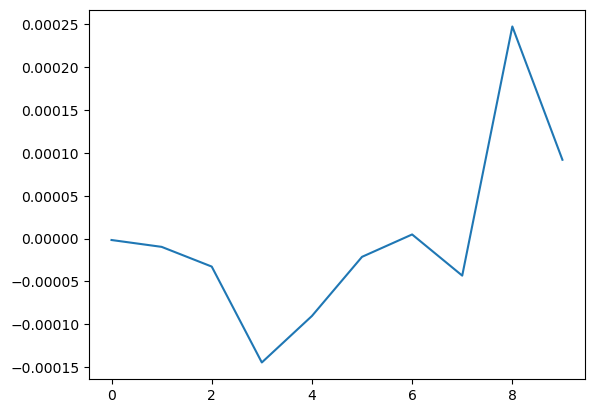

In [ ]:
plt.plot(ts_paa.reshape(ts_paa.shape[1], ts_paa.shape[0]))
plt.show()

In [ ]:
km = TimeSeriesKMeans(n_clusters=3, metric="euclidean", max_iter=5, random_state=0)
km.fit(ts_paa)

TimeSeriesKMeans(max_iter=5, random_state=0)

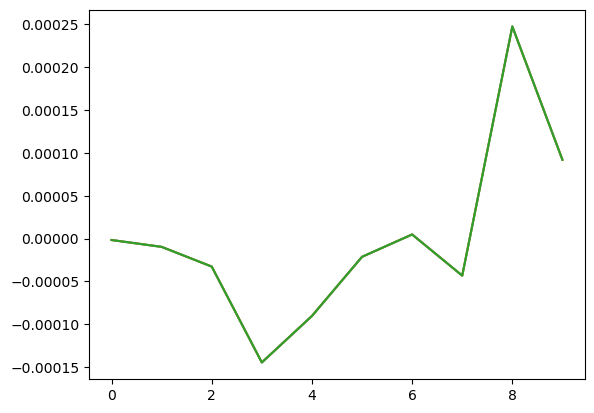

In [ ]:
plt.plot(np.squeeze(km.cluster_centers_).T)
plt.show()

In [ ]:
km.labels_